In [5]:
#Import data
import os
from datetime import datetime
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

data_dir = "/Users/ldosnon/Desktop/data_yolov8/Peak_segmentation_database/Labeled_array/C_CAT_C/train/"

# Initialize empty lists to store data from all files
X_list = []
y_list = []

scaler = MinMaxScaler()


# Loop through each file in the directory
for file_name in os.listdir(data_dir):
    if file_name.endswith(".txt"):
        file_path = os.path.join(data_dir, file_name)

        # Load data from the current file
        data = np.loadtxt(file_path)

        # Assuming your data is structured with three columns
        X_file = data[:, :2]  # Assuming the first two columns are 'pixel_number' and 'intensity'
        y_file = data[:, 2]   # Assuming the third column is 'probability'
        
        
        #TRY NORMALIZING THE DATA
        X_file = scaler.fit_transform(X_file)
        y_file = scaler.fit_transform(y_file.reshape(-1,1))



        X_list.append(X_file)
        y_list.append(y_file)

# Concatenate data from all files
X = np.concatenate(X_list, axis=0)
#The number of line is the pixel from all the files, columns 1: pixel number, colums 2 is intensity


y = np.concatenate(y_list, axis=0)

#y are the associated probabilites

print(np.shape(X))



(47130, 2)


Epoch 1/200
7541/7541 [==============================] - 7s 883us/step - loss: 0.4174 - accuracy: 0.8093 - val_loss: 0.3511 - val_accuracy: 0.8302
Epoch 2/200
7541/7541 [==============================] - 7s 876us/step - loss: 0.3786 - accuracy: 0.8269 - val_loss: 0.3404 - val_accuracy: 0.8379
Epoch 3/200
7541/7541 [==============================] - 7s 903us/step - loss: 0.3748 - accuracy: 0.8279 - val_loss: 0.3424 - val_accuracy: 0.8360
Epoch 4/200
7541/7541 [==============================] - 7s 914us/step - loss: 0.3707 - accuracy: 0.8296 - val_loss: 0.3404 - val_accuracy: 0.8373
Epoch 5/200
7541/7541 [==============================] - 7s 909us/step - loss: 0.3694 - accuracy: 0.8298 - val_loss: 0.3409 - val_accuracy: 0.8390
Epoch 6/200
7541/7541 [==============================] - 7s 917us/step - loss: 0.3678 - accuracy: 0.8305 - val_loss: 0.3399 - val_accuracy: 0.8385
Epoch 7/200
7541/7541 [==============================] - 7s 966us/step - loss: 0.3664 - accuracy: 0.8308 - val_loss: 0

7541/7541 [==============================] - 7s 966us/step - loss: 0.3286 - accuracy: 0.8449 - val_loss: 0.2988 - val_accuracy: 0.8569
Epoch 112/200
7541/7541 [==============================] - 7s 965us/step - loss: 0.3273 - accuracy: 0.8456 - val_loss: 0.3057 - val_accuracy: 0.8533
Epoch 113/200
7541/7541 [==============================] - 7s 931us/step - loss: 0.3285 - accuracy: 0.8479 - val_loss: 0.3059 - val_accuracy: 0.8525
Epoch 114/200
7541/7541 [==============================] - 7s 933us/step - loss: 0.3278 - accuracy: 0.8470 - val_loss: 0.3006 - val_accuracy: 0.8576
Epoch 115/200
7541/7541 [==============================] - 7s 918us/step - loss: 0.3277 - accuracy: 0.8466 - val_loss: 0.3043 - val_accuracy: 0.8581
Epoch 116/200
7541/7541 [==============================] - 7s 918us/step - loss: 0.3283 - accuracy: 0.8460 - val_loss: 0.3034 - val_accuracy: 0.8546
Epoch 117/200
7541/7541 [==============================] - 7s 925us/step - loss: 0.3266 - accuracy: 0.8474 - val_loss: 0

7541/7541 [==============================] - 7s 959us/step - loss: 0.3256 - accuracy: 0.8476 - val_loss: 0.2963 - val_accuracy: 0.8576
Epoch 167/200
7541/7541 [==============================] - 7s 950us/step - loss: 0.3257 - accuracy: 0.8481 - val_loss: 0.3035 - val_accuracy: 0.8556
Epoch 168/200
7541/7541 [==============================] - 8s 997us/step - loss: 0.3265 - accuracy: 0.8467 - val_loss: 0.3009 - val_accuracy: 0.8577
Epoch 169/200
7541/7541 [==============================] - 8s 1ms/step - loss: 0.3263 - accuracy: 0.8476 - val_loss: 0.2973 - val_accuracy: 0.8603
Epoch 170/200
7541/7541 [==============================] - 8s 1000us/step - loss: 0.3250 - accuracy: 0.8495 - val_loss: 0.2979 - val_accuracy: 0.8589
Epoch 171/200
7541/7541 [==============================] - 7s 989us/step - loss: 0.3247 - accuracy: 0.8473 - val_loss: 0.2956 - val_accuracy: 0.8590
Epoch 172/200
7541/7541 [==============================] - 7s 990us/step - loss: 0.3267 - accuracy: 0.8469 - val_loss: 0.

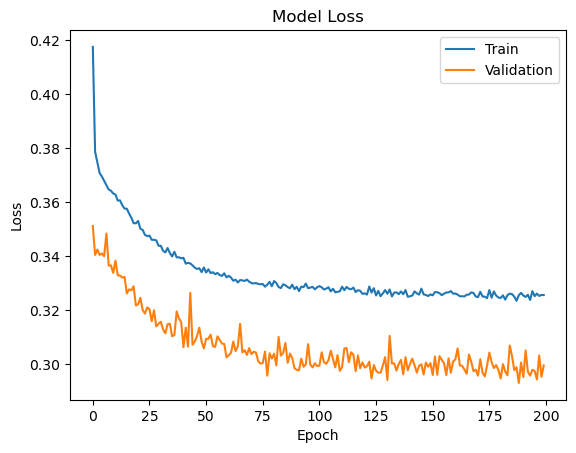

In [10]:
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(X.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation = 'sigmoid' )
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001) 

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X, y, epochs=200, batch_size=5, validation_split=0.2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()



In [7]:
path="/Users/ldosnon/Desktop/data_yolov8/Peak_segmentation_database/"
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
#model_filename = f'model_{current_time}.h5'
#model.save(path + model_filename)

In [8]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, accuracy_score


# Load the model from the file

def process_test(path_test_files):
    total_precision = []
    total_recall = []
    total_F1 = [] 
    total_accuracy = []
    for file_name in os.listdir(path_test_files):
        if file_name.endswith(".txt"):
            file_path = os.path.join(path_test_files, file_name)
            print(file_name)

            # Load data from the current file
            data = np.loadtxt(file_path)
            print(np.shape(data))
            print(type(data))

            X_test = data[:, :2]  # Assuming the first two columns are 'pixel_number' and 'intensity'
            y_test = data[:, 2] 
            
            #Normalizing the data
            X_test = scaler.fit_transform(X_test)
            y_test = scaler.fit_transform(y_test.reshape(-1,1))

            predictions = loaded_model.predict(X_test)
            binary_predictions = (predictions >= 0.5).astype(int)


            pixel_nb = X_test[:,0]
            intensity_values = X_test[:,1]

            # Plot the original data points and predicted regions
            plt.figure(figsize=(12, 6))

            # Subplot for predicted regions
            plt.subplot(1, 2, 1)
            plt.plot(X_test[:, 0], X_test[:, 1], label='Original Data')

            regions_pred = []
            current_region_start = None

            for i in range(binary_predictions.shape[0]):
                if binary_predictions[i] == 1:
                    if current_region_start is None:
                        current_region_start = i
                else:
                    if current_region_start is not None:
                        regions_pred.append((current_region_start, i - 1))
                        current_region_start = None

            if current_region_start is not None:
                regions_pred.append((current_region_start, binary_predictions.shape[0] - 1))

            for region_start, region_end in regions_pred:
                plt.axvspan(X_test[region_start, 0], X_test[region_end, 0], color='r', alpha=0.3, label=np.unique('Region Predicted as peaks'))

            precision, recall, fscore, _ = precision_recall_fscore_support(y_test, binary_predictions, average='binary')
            accuracy = accuracy_score(y_test, binary_predictions)
           
            plt.title("Model Predictions")
            plt.xlabel("Normalized Pixel Number")
            plt.ylabel("Normalized Intensity")
            plt.legend()

            # Subplot for ground truth regions
            plt.subplot(1, 2, 2)
            plt.plot(X_test[:, 0], X_test[:, 1], label='Original Data')

            regions_gt = []
            current_region_start = None

            for i in range(y_test.shape[0]):
                if y_test[i] == 1:
                    if current_region_start is None:
                        current_region_start = i
                else:
                    if current_region_start is not None:
                        regions_gt.append((current_region_start, i - 1))
                        current_region_start = None

            if current_region_start is not None:
                regions_gt.append((current_region_start, y_test.shape[0] - 1))

            for region_start, region_end in regions_gt:
                plt.axvspan(X_test[region_start, 0], X_test[region_end, 0], color='g', alpha=0.3, label='Region Ground Truth as peaks')

            plt.title("Ground Truth Regions")
            plt.xlabel("Normalized Pixel Number")
            plt.ylabel("Normalized Intensity ")
            plt.legend()

            plt.tight_layout()
            plt.show()
            
            # Display the metrics
            total_accuracy.append(accuracy)
            total_precision.append(precision)
            total_recall.append(recall)
            total_F1.append(fscore)
            print(f'Accuracy: {accuracy:.2f}')
            print(f'Precision: {precision:.2f}')
            print(f'Recall (TP/(TP+FN)): {recall:.2f}')
            print(f'F1 Score (harmonic mean of precision and recall): {fscore:.2f}')
        

    print("Average accuracy of the model: ", np.mean(total_accuracy))
    print("Average precision of the model: ", np.mean(total_precision))
    print("Average recall of the model: ", np.mean(total_recall))
    print("Average f1 score of the model: ", np.mean(total_F1))




39-0-1_jpg.rf.b5fb27d00cabe3a3b8da52917180498c.jpg.txt_labeled.txt
(117, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 703us/step


Accuracy: 0.85
Precision: 1.00
Recall (TP/(TP+FN)): 0.77
F1 Score (harmonic mean of precision and recall): 0.87
53-1_jpg.rf.18b70d250840d65963f34f8283ec5661.jpg.txt_labeled.txt
(132, 3)
<class 'numpy.ndarray'>
5/5 [==============================] - 0s 566us/step


Accuracy: 0.91
Precision: 0.98
Recall (TP/(TP+FN)): 0.86
F1 Score (harmonic mean of precision and recall): 0.92
29-0-_jpg.rf.4aeeed870f4f225883a11e0696b5f9b4.jpg.txt_labeled.txt
(88, 3)
<class 'numpy.ndarray'>
3/3 [==============================] - 0s 687us/step


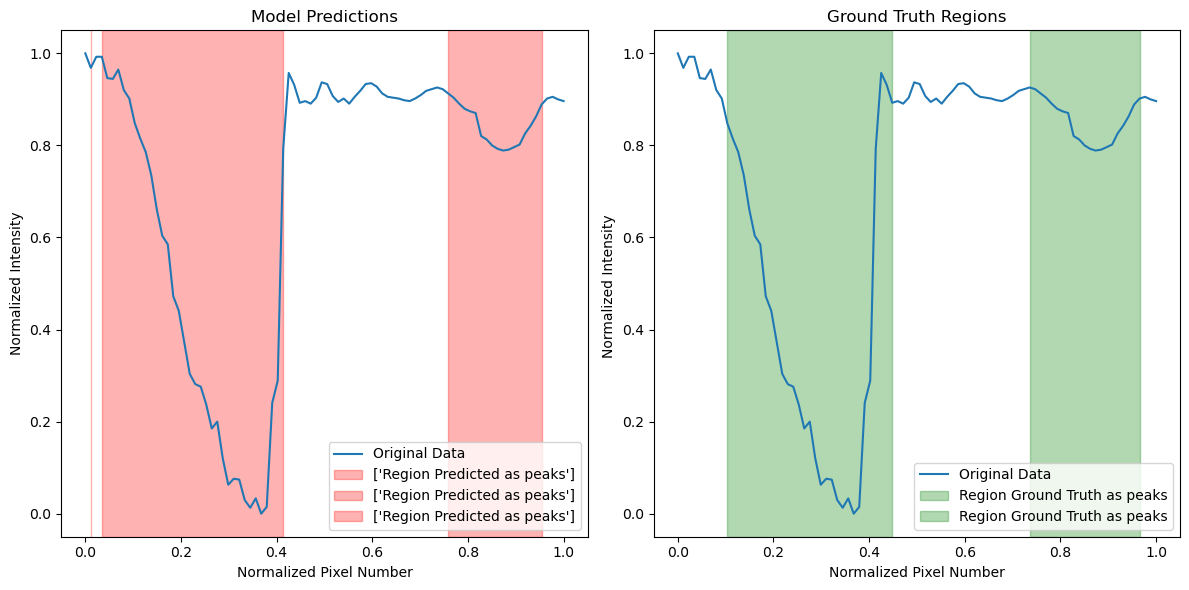

Accuracy: 0.85
Precision: 0.87
Recall (TP/(TP+FN)): 0.88
F1 Score (harmonic mean of precision and recall): 0.88
53-250_jpg.rf.b0d175b181aed936e82e456389629936.jpg.txt_labeled.txt
(146, 3)
<class 'numpy.ndarray'>
5/5 [==============================] - 0s 566us/step


Accuracy: 0.93
Precision: 1.00
Recall (TP/(TP+FN)): 0.87
F1 Score (harmonic mean of precision and recall): 0.93
29-100-_jpg.rf.721df2fd64317f4dfa25d3b2a7d55546.jpg.txt_labeled.txt
(95, 3)
<class 'numpy.ndarray'>
3/3 [==============================] - 0s 803us/step


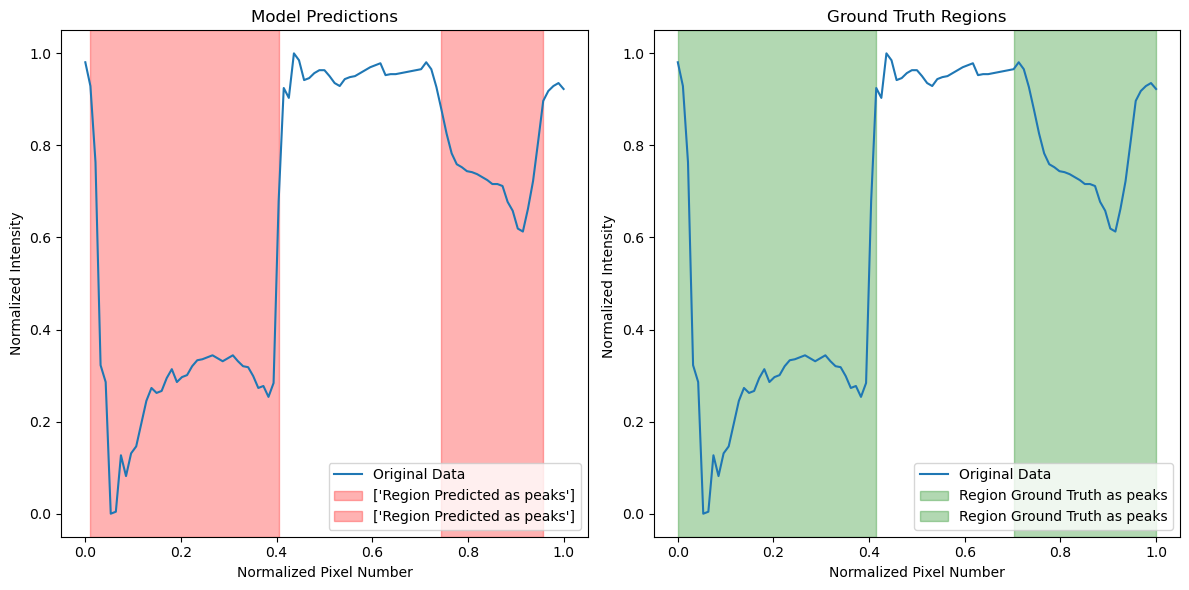

Accuracy: 0.89
Precision: 1.00
Recall (TP/(TP+FN)): 0.86
F1 Score (harmonic mean of precision and recall): 0.92
17-100-_jpg.rf.27e43697fe3f617b02dafc2a16621107.jpg.txt_labeled.txt
(93, 3)
<class 'numpy.ndarray'>
3/3 [==============================] - 0s 723us/step


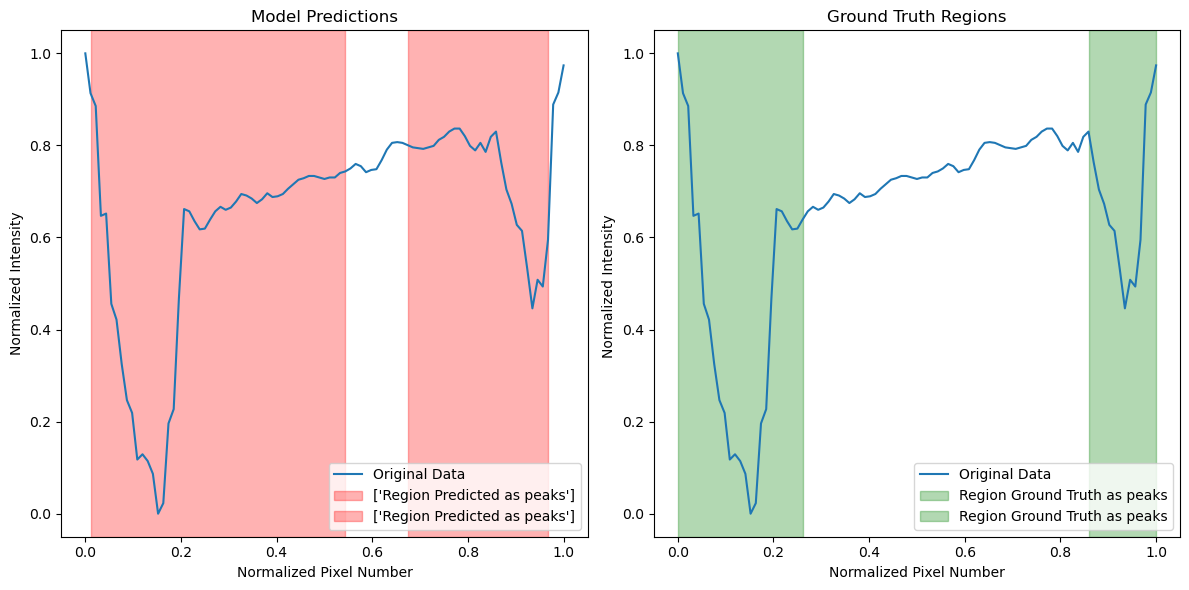

Accuracy: 0.49
Precision: 0.45
Recall (TP/(TP+FN)): 0.90
F1 Score (harmonic mean of precision and recall): 0.60
18-0mg-_jpg.rf.21c8e6a8a8f6002bcdc3243d1ac9021e.jpg.txt_labeled.txt
(182, 3)
<class 'numpy.ndarray'>
6/6 [==============================] - 0s 554us/step


Accuracy: 0.89
Precision: 1.00
Recall (TP/(TP+FN)): 0.82
F1 Score (harmonic mean of precision and recall): 0.90
50-100_jpg.rf.c29c55b7efd212c64f1b45dba698e60c.jpg.txt_labeled.txt
(106, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 598us/step


Accuracy: 0.86
Precision: 0.91
Recall (TP/(TP+FN)): 0.84
F1 Score (harmonic mean of precision and recall): 0.87
27-500_jpg.rf.63571070227815aa550b4a220b986007.jpg.txt_labeled.txt
(130, 3)
<class 'numpy.ndarray'>
5/5 [==============================] - 0s 557us/step


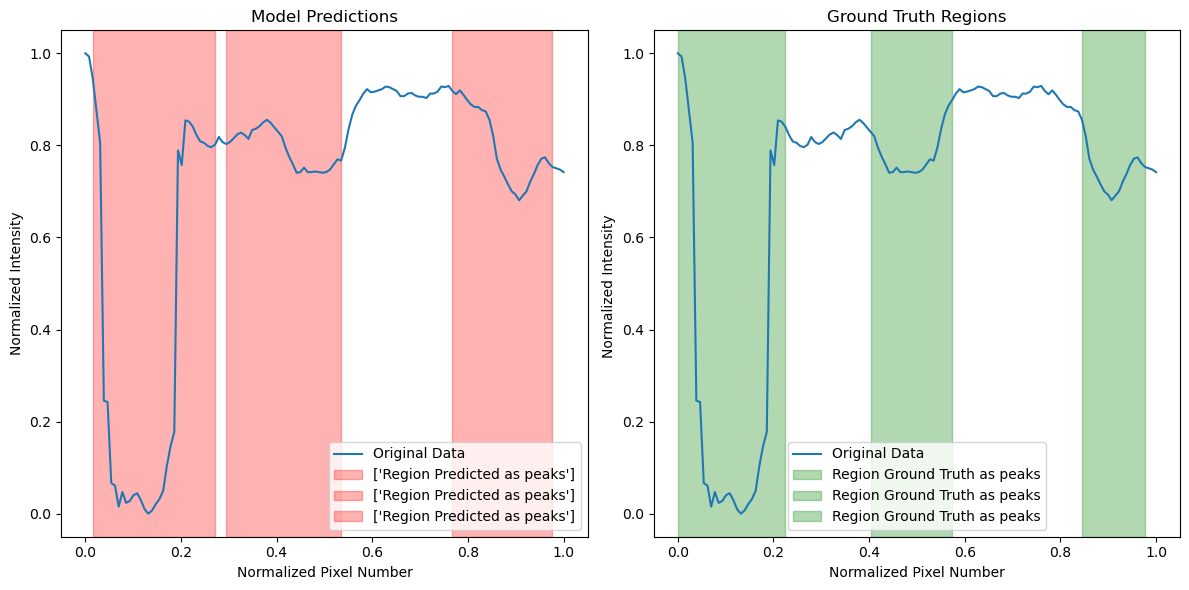

Accuracy: 0.72
Precision: 0.68
Recall (TP/(TP+FN)): 0.90
F1 Score (harmonic mean of precision and recall): 0.78
22-0_jpg.rf.26b7bddbbd4bf74e8b8eabcbe6ceead2.jpg.txt_labeled.txt
(95, 3)
<class 'numpy.ndarray'>
3/3 [==============================] - 0s 689us/step


Accuracy: 0.71
Precision: 0.58
Recall (TP/(TP+FN)): 0.95
F1 Score (harmonic mean of precision and recall): 0.72
20-25_jpg.rf.af37b8c4ba23c96cdaaaa9d760302556.jpg.txt_labeled.txt
(108, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 615us/step


Accuracy: 0.89
Precision: 0.95
Recall (TP/(TP+FN)): 0.88
F1 Score (harmonic mean of precision and recall): 0.91
59-10-_jpg.rf.93ddc10f3fb1e08e7f75c8ead98c039d.jpg.txt_labeled.txt
(230, 3)
<class 'numpy.ndarray'>
8/8 [==============================] - 0s 520us/step


Accuracy: 0.86
Precision: 0.86
Recall (TP/(TP+FN)): 0.93
F1 Score (harmonic mean of precision and recall): 0.89
48-250_jpg.rf.761e8d8478e1cb491a1604ed73fe5892.jpg.txt_labeled.txt
(110, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 654us/step


Accuracy: 0.84
Precision: 0.93
Recall (TP/(TP+FN)): 0.84
F1 Score (harmonic mean of precision and recall): 0.88
12-500_jpg.rf.ce71f3436474455c939d27a181cc2975.jpg.txt_labeled.txt
(99, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 591us/step


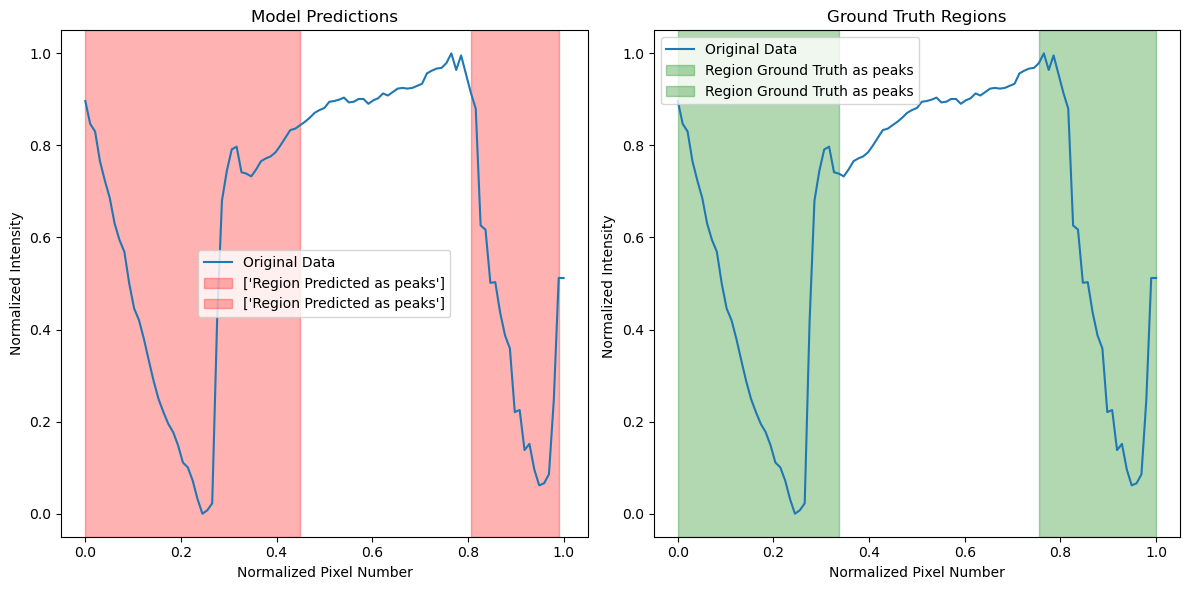

Accuracy: 0.83
Precision: 0.83
Recall (TP/(TP+FN)): 0.90
F1 Score (harmonic mean of precision and recall): 0.86
57-35_jpg.rf.0d76409ad3c825d756a2ef3e55724932.jpg.txt_labeled.txt
(99, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 540us/step


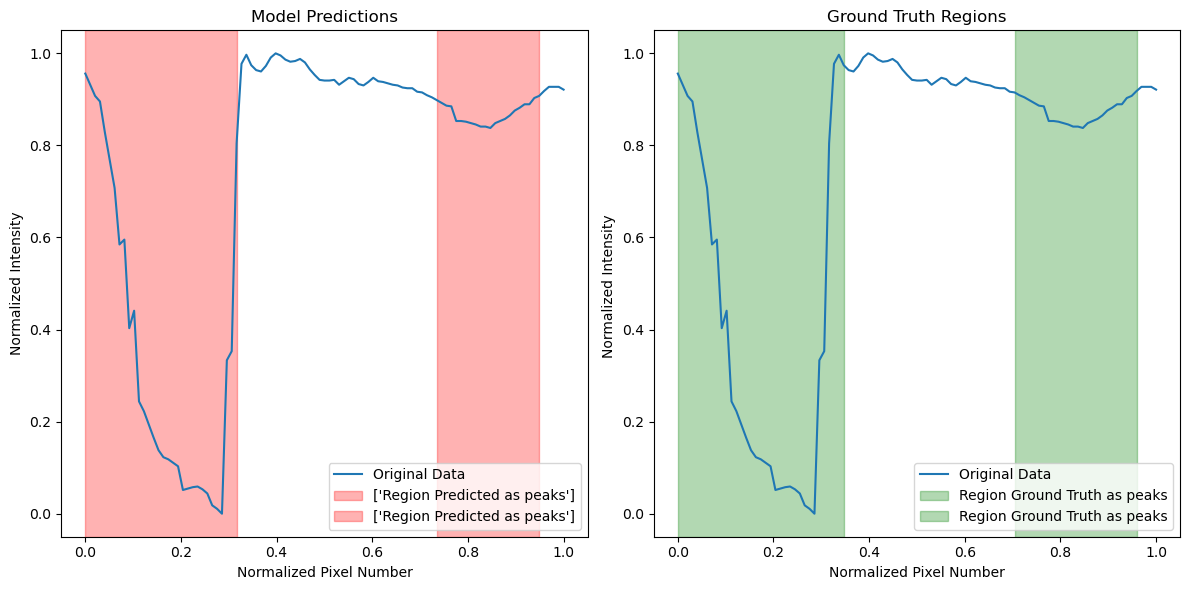

Accuracy: 0.93
Precision: 1.00
Recall (TP/(TP+FN)): 0.89
F1 Score (harmonic mean of precision and recall): 0.94
3-50_jpg.rf.77949f9038f5a66bd79259aefa52b6c9.jpg.txt_labeled.txt
(99, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 820us/step


Accuracy: 0.90
Precision: 1.00
Recall (TP/(TP+FN)): 0.85
F1 Score (harmonic mean of precision and recall): 0.92
59-5-_jpg.rf.299dd5dcb3e06a2c16e1a5ac919d72d5.jpg.txt_labeled.txt
(229, 3)
<class 'numpy.ndarray'>
8/8 [==============================] - 0s 668us/step


Accuracy: 0.83
Precision: 0.81
Recall (TP/(TP+FN)): 0.94
F1 Score (harmonic mean of precision and recall): 0.87
16-5_jpg.rf.5b68a6513fa864f8412164e1e2e2a776.jpg.txt_labeled.txt
(115, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 1ms/step


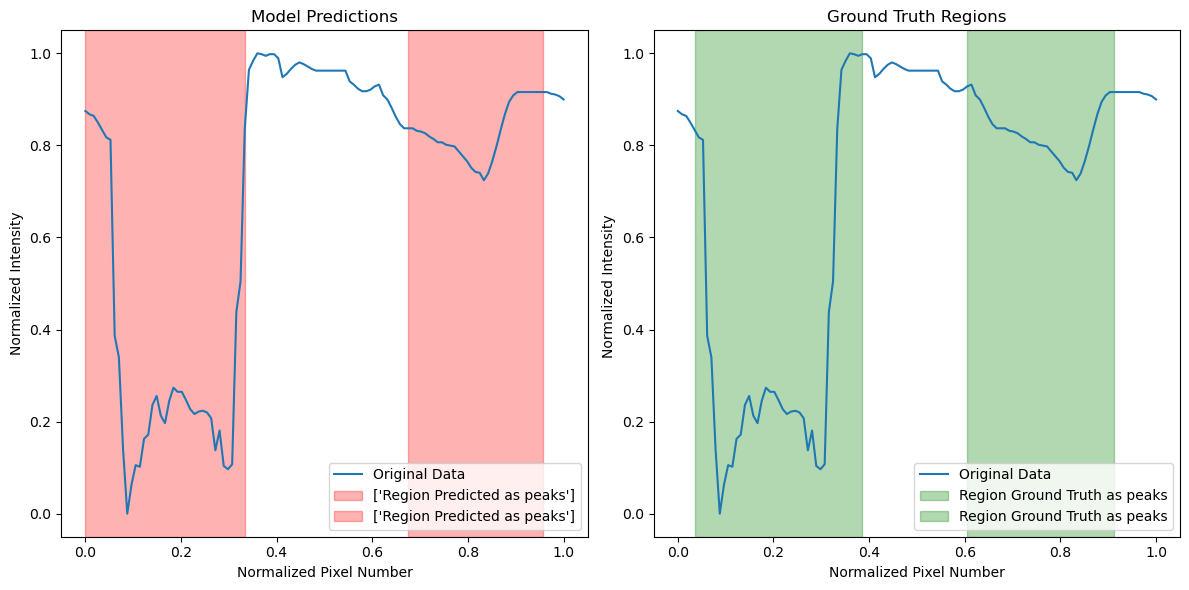

Accuracy: 0.80
Precision: 0.88
Recall (TP/(TP+FN)): 0.82
F1 Score (harmonic mean of precision and recall): 0.85
62-500_jpg.rf.d36a105c346df80866c054d91fdf8b37.jpg.txt_labeled.txt
(162, 3)
<class 'numpy.ndarray'>
6/6 [==============================] - 0s 528us/step


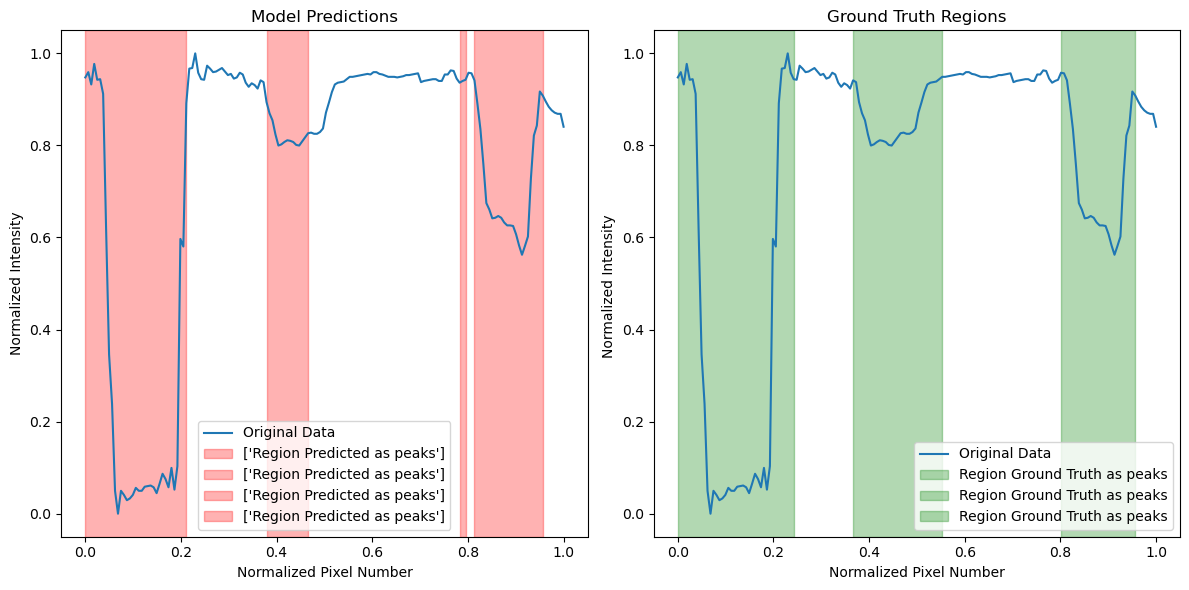

Accuracy: 0.84
Precision: 0.96
Recall (TP/(TP+FN)): 0.76
F1 Score (harmonic mean of precision and recall): 0.85
11-100_jpg.rf.4f63e0a288a56cad80cfd96a4f712a4b.jpg.txt_labeled.txt
(90, 3)
<class 'numpy.ndarray'>
3/3 [==============================] - 0s 683us/step


Accuracy: 0.90
Precision: 1.00
Recall (TP/(TP+FN)): 0.85
F1 Score (harmonic mean of precision and recall): 0.92
27-0_jpg.rf.7cb6b424c0d31fee2aee422501bca564.jpg.txt_labeled.txt
(83, 3)
<class 'numpy.ndarray'>
3/3 [==============================] - 0s 681us/step


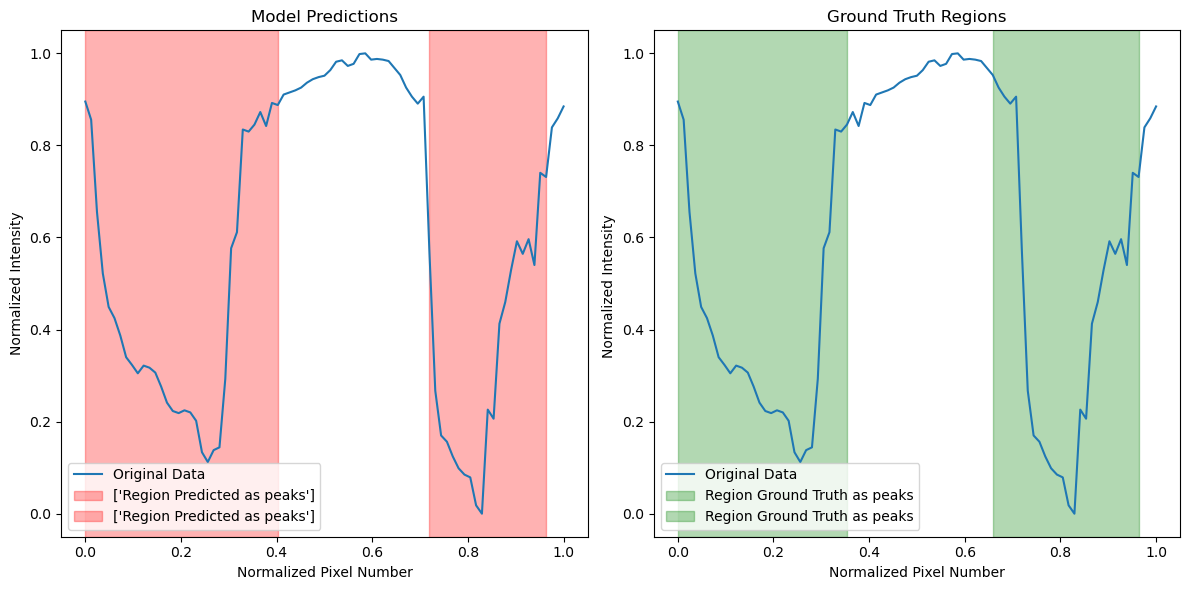

Accuracy: 0.89
Precision: 0.93
Recall (TP/(TP+FN)): 0.91
F1 Score (harmonic mean of precision and recall): 0.92
59-50-_jpg.rf.240050fdd7a88bf1dbc716ec30eb9d14.jpg.txt_labeled.txt
(219, 3)
<class 'numpy.ndarray'>
7/7 [==============================] - 0s 476us/step


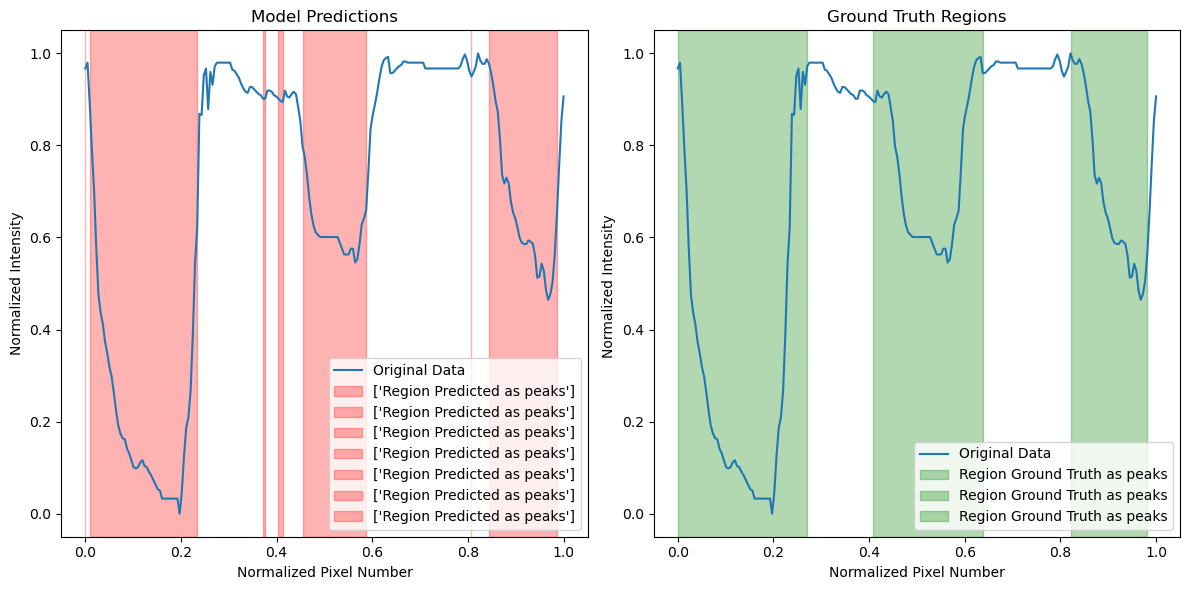

Accuracy: 0.83
Precision: 0.96
Recall (TP/(TP+FN)): 0.78
F1 Score (harmonic mean of precision and recall): 0.86
59-0-1-_jpg.rf.608107cbfcd43055ea9b050caa86cc0b.jpg.txt_labeled.txt
(228, 3)
<class 'numpy.ndarray'>
8/8 [==============================] - 0s 473us/step


Accuracy: 0.76
Precision: 0.73
Recall (TP/(TP+FN)): 0.91
F1 Score (harmonic mean of precision and recall): 0.81
8-250-_jpg.rf.8927685f0489d3c00418e2cfc7088ba0.jpg.txt_labeled.txt
(143, 3)
<class 'numpy.ndarray'>
5/5 [==============================] - 0s 542us/step


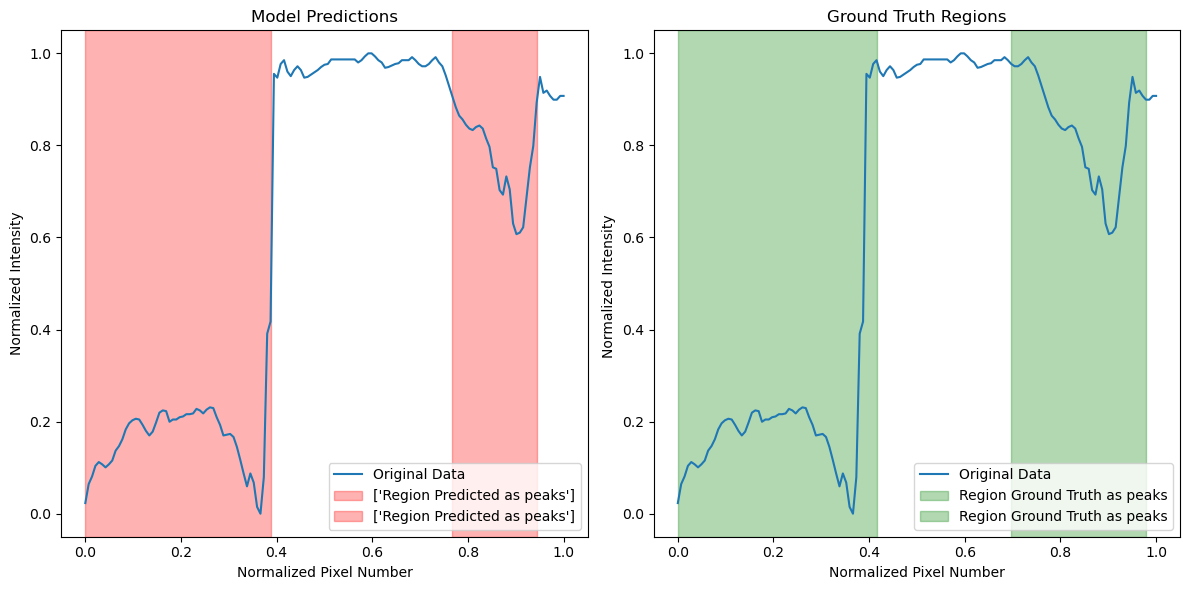

Accuracy: 0.87
Precision: 1.00
Recall (TP/(TP+FN)): 0.81
F1 Score (harmonic mean of precision and recall): 0.90
15-0-_jpg.rf.37839f7bd166ae9ce9ff5b598483059c.jpg.txt_labeled.txt
(99, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 541us/step


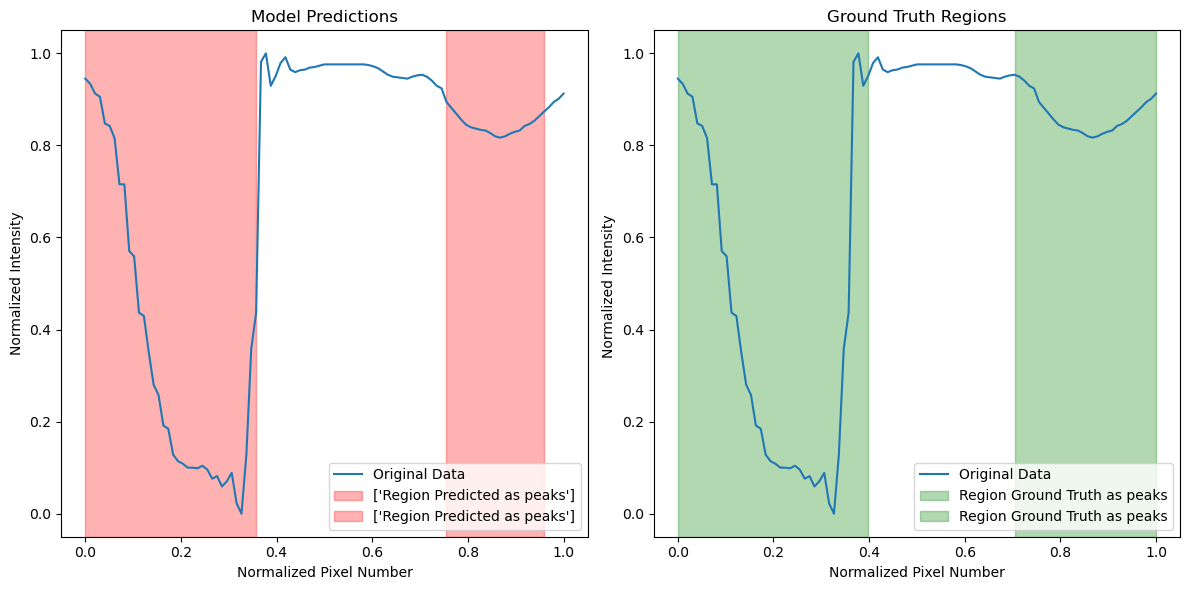

Accuracy: 0.87
Precision: 1.00
Recall (TP/(TP+FN)): 0.81
F1 Score (harmonic mean of precision and recall): 0.90
2-100_jpg.rf.faeb5a6f3f200ceded4a73d3ae902d6a.jpg.txt_labeled.txt
(90, 3)
<class 'numpy.ndarray'>
3/3 [==============================] - 0s 650us/step


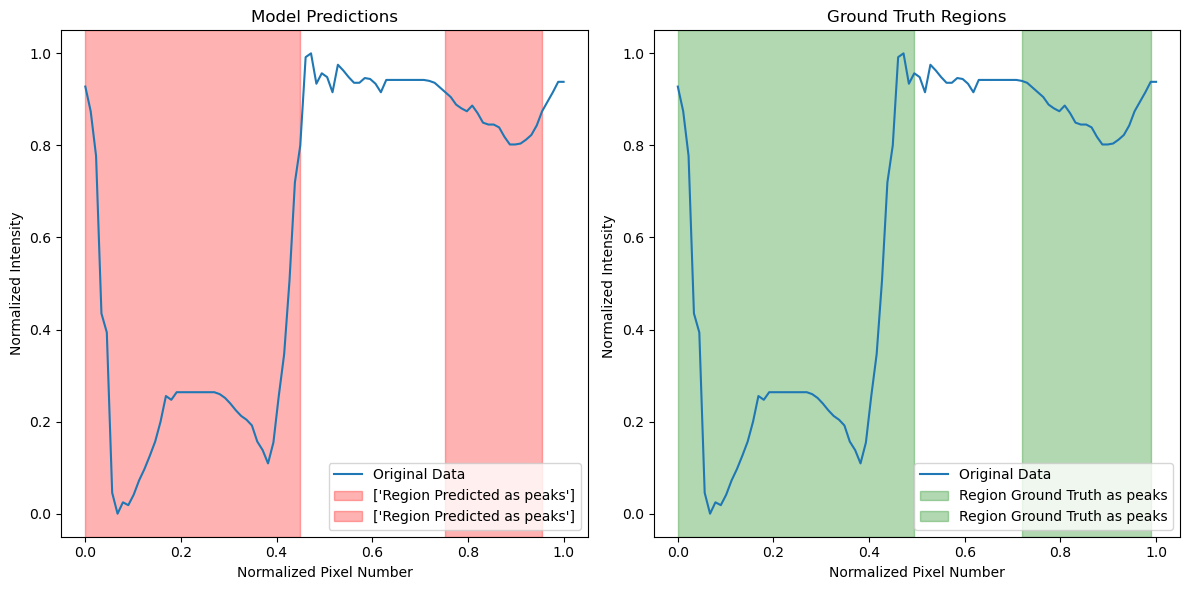

Accuracy: 0.89
Precision: 1.00
Recall (TP/(TP+FN)): 0.86
F1 Score (harmonic mean of precision and recall): 0.92
7-0-_jpg.rf.ad11dca656de7e4cd52ba60d57ae692c.jpg.txt_labeled.txt
(97, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 559us/step


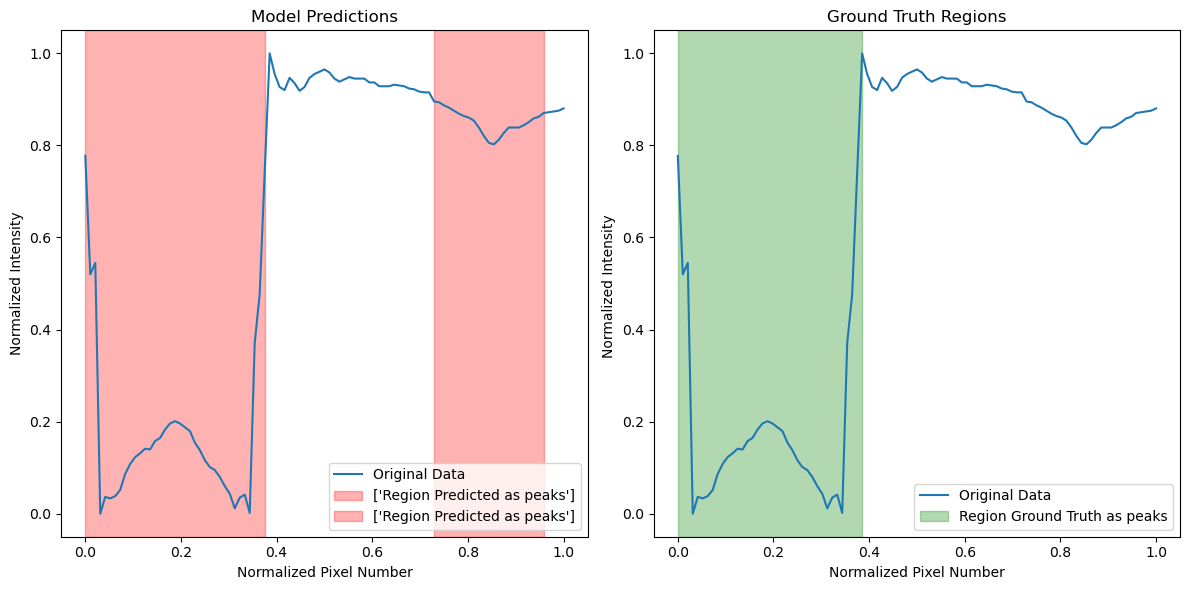

Accuracy: 0.75
Precision: 0.62
Recall (TP/(TP+FN)): 0.97
F1 Score (harmonic mean of precision and recall): 0.76
54-50_jpg.rf.df8bbc64cd6deed930fcaca8af0c9bbd.jpg.txt_labeled.txt
(144, 3)
<class 'numpy.ndarray'>
5/5 [==============================] - 0s 513us/step


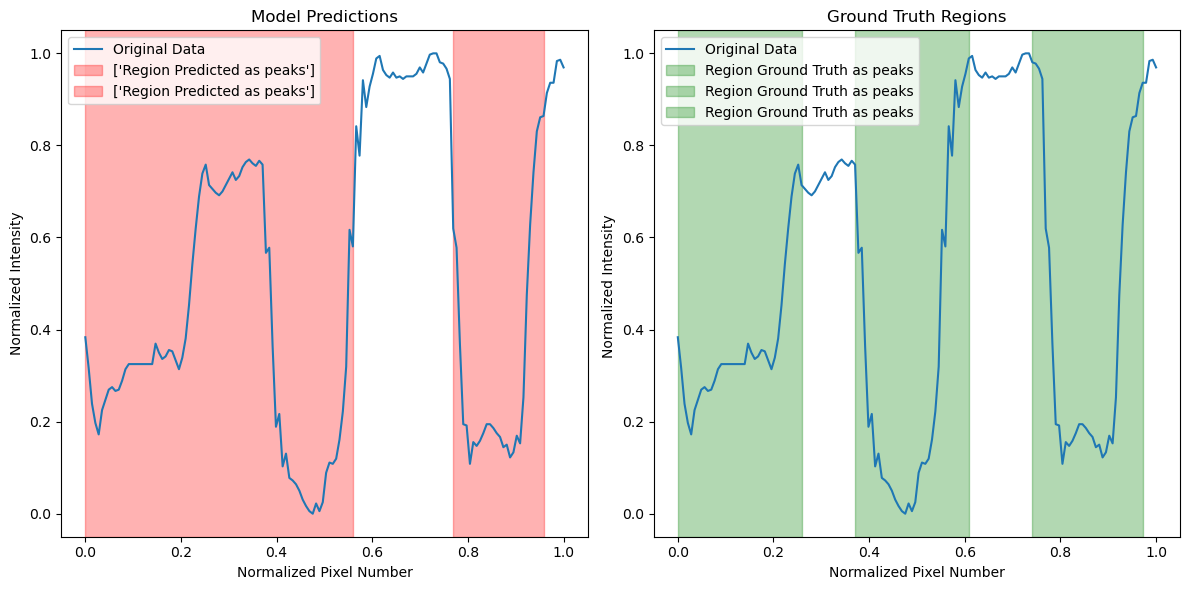

Accuracy: 0.81
Precision: 0.86
Recall (TP/(TP+FN)): 0.88
F1 Score (harmonic mean of precision and recall): 0.87
45-10-_jpg.rf.c3d381023d9c50015f760603bc2a7460.jpg.txt_labeled.txt
(99, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 564us/step


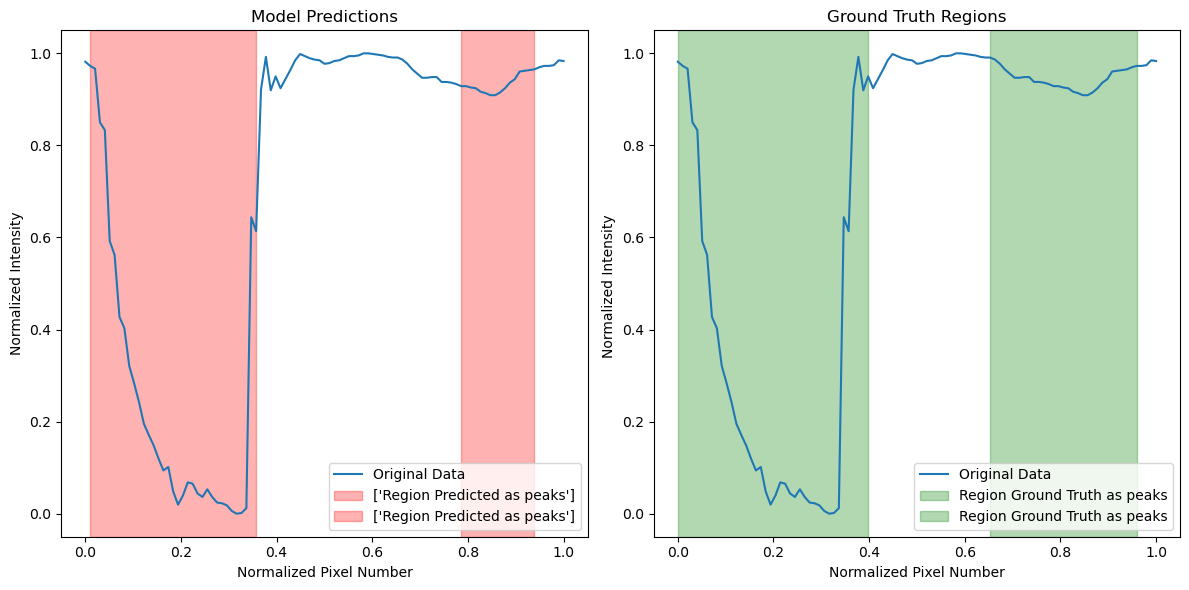

Accuracy: 0.80
Precision: 1.00
Recall (TP/(TP+FN)): 0.72
F1 Score (harmonic mean of precision and recall): 0.84
29-35_jpg.rf.779963ded8161f004521624f99ca05f5.jpg.txt_labeled.txt
(95, 3)
<class 'numpy.ndarray'>
3/3 [==============================] - 0s 678us/step


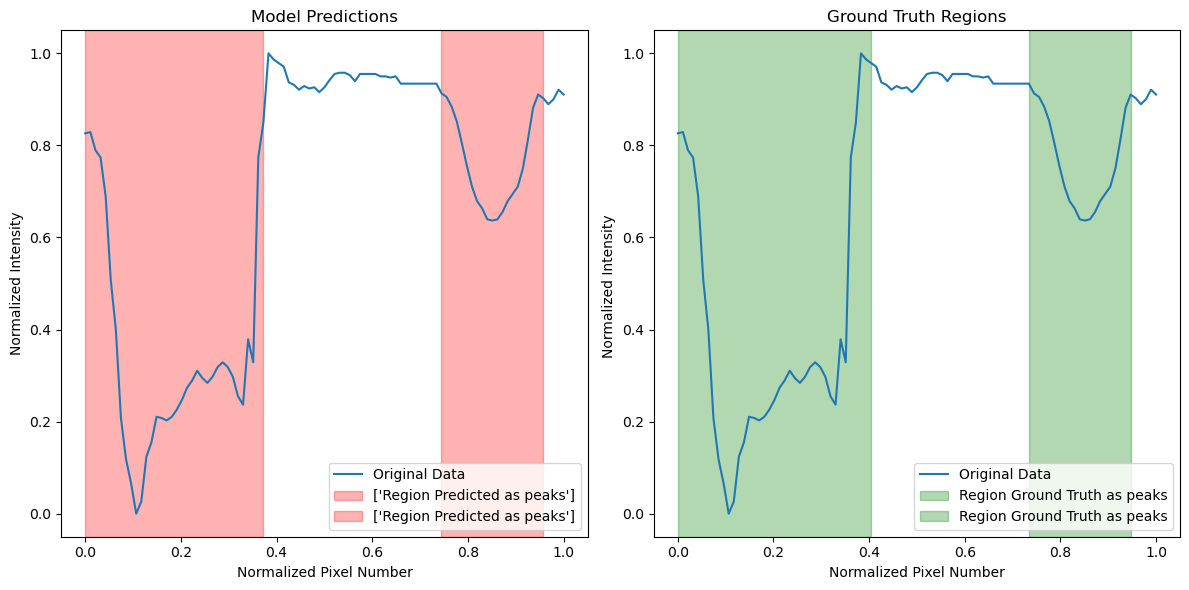

Accuracy: 0.95
Precision: 0.98
Recall (TP/(TP+FN)): 0.93
F1 Score (harmonic mean of precision and recall): 0.96
10-12-5_jpg.rf.7bd038b9153309626c0114a5fc9073bb.jpg.txt_labeled.txt
(115, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 559us/step


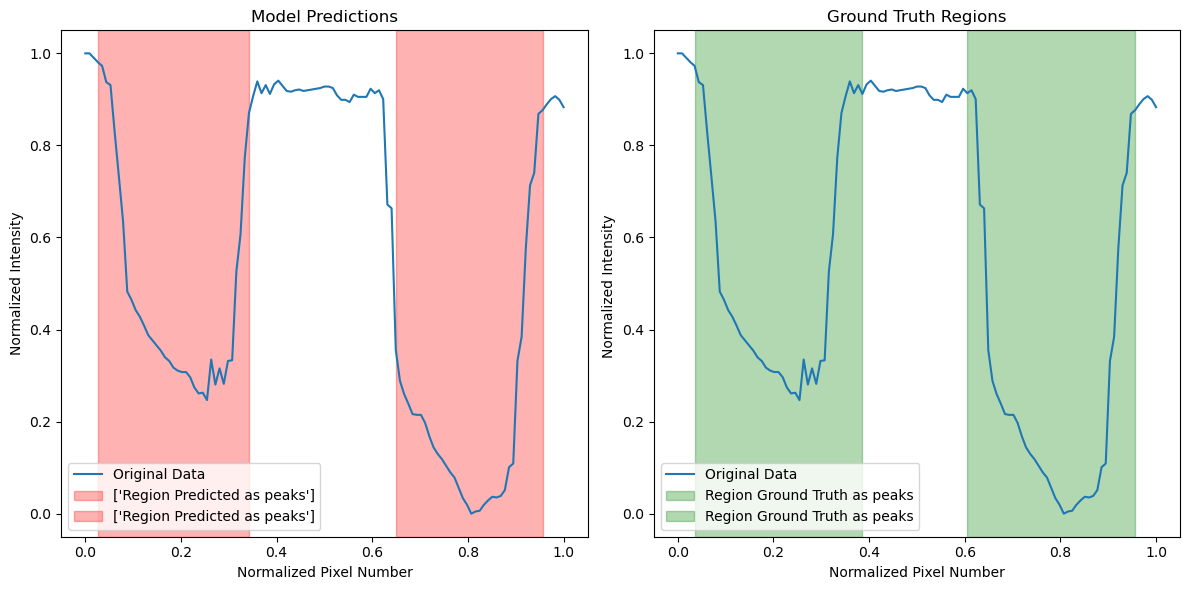

Accuracy: 0.90
Precision: 0.99
Recall (TP/(TP+FN)): 0.88
F1 Score (harmonic mean of precision and recall): 0.93
22-250_jpg.rf.bbe69f8bf6011d6733e5df24053d36cb.jpg.txt_labeled.txt
(101, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 583us/step


Accuracy: 0.87
Precision: 0.93
Recall (TP/(TP+FN)): 0.86
F1 Score (harmonic mean of precision and recall): 0.90
14-250_jpg.rf.8cf01f40c436f5df5194237f56cdc0c0.jpg.txt_labeled.txt
(90, 3)
<class 'numpy.ndarray'>
3/3 [==============================] - 0s 679us/step


Accuracy: 0.82
Precision: 1.00
Recall (TP/(TP+FN)): 0.77
F1 Score (harmonic mean of precision and recall): 0.87
62-1_jpg.rf.28a9bab2f1ecae01ed6b4f4fcd466f06.jpg.txt_labeled.txt
(148, 3)
<class 'numpy.ndarray'>
5/5 [==============================] - 0s 543us/step


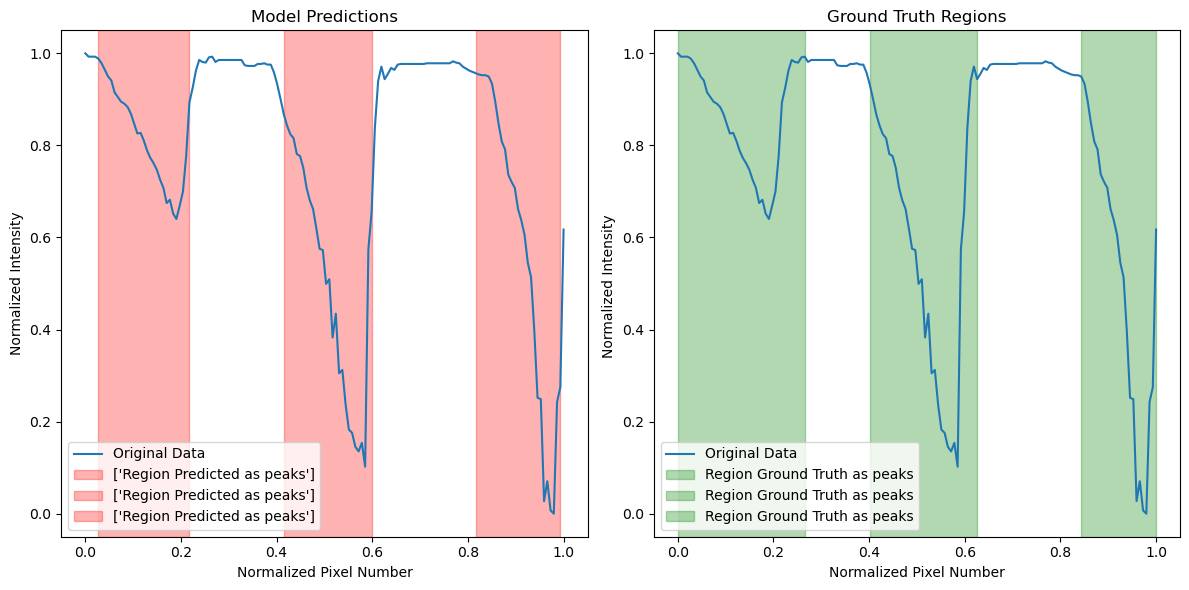

Accuracy: 0.85
Precision: 0.95
Recall (TP/(TP+FN)): 0.82
F1 Score (harmonic mean of precision and recall): 0.88
40-100-_jpg.rf.9526c10fd30ee91eb03a724251153498.jpg.txt_labeled.txt
(123, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 617us/step


Accuracy: 0.61
Precision: 0.59
Recall (TP/(TP+FN)): 0.96
F1 Score (harmonic mean of precision and recall): 0.73
51-0-1_jpg.rf.ac46a28a6d92aa5665962b7cb013a46e.jpg.txt_labeled.txt
(179, 3)
<class 'numpy.ndarray'>
6/6 [==============================] - 0s 639us/step


Accuracy: 0.91
Precision: 0.95
Recall (TP/(TP+FN)): 0.88
F1 Score (harmonic mean of precision and recall): 0.91
23-5000_jpg.rf.13447a4ffa75b46e753a0ab081806aed.jpg.txt_labeled.txt
(119, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 615us/step


Accuracy: 0.84
Precision: 0.84
Recall (TP/(TP+FN)): 0.88
F1 Score (harmonic mean of precision and recall): 0.86
45-500-_jpg.rf.f22551f17a2b7d5dca1ef3c18e557af2.jpg.txt_labeled.txt
(90, 3)
<class 'numpy.ndarray'>
3/3 [==============================] - 0s 705us/step


Accuracy: 0.84
Precision: 1.00
Recall (TP/(TP+FN)): 0.79
F1 Score (harmonic mean of precision and recall): 0.88
1-50_jpg.rf.15525eee91638851d12fbedcbbc7a500.jpg.txt_labeled.txt
(75, 3)
<class 'numpy.ndarray'>
3/3 [==============================] - 0s 644us/step


Accuracy: 0.80
Precision: 0.89
Recall (TP/(TP+FN)): 0.81
F1 Score (harmonic mean of precision and recall): 0.85
24-0-1_jpg.rf.c1b640aeb4b28a74378d34afac170115.jpg.txt_labeled.txt
(143, 3)
<class 'numpy.ndarray'>
5/5 [==============================] - 0s 526us/step


Accuracy: 0.83
Precision: 0.97
Recall (TP/(TP+FN)): 0.76
F1 Score (harmonic mean of precision and recall): 0.85
51-250_jpg.rf.317d71a94f07a90226d3804b3ef74c97.jpg.txt_labeled.txt
(159, 3)
<class 'numpy.ndarray'>
5/5 [==============================] - 0s 504us/step


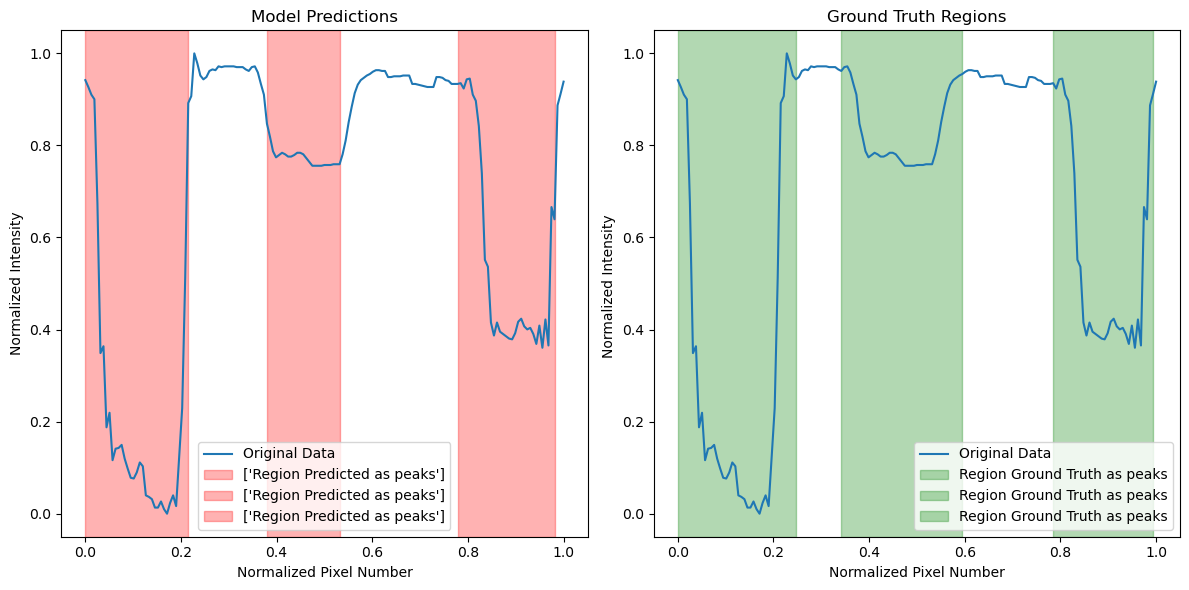

Accuracy: 0.85
Precision: 0.99
Recall (TP/(TP+FN)): 0.80
F1 Score (harmonic mean of precision and recall): 0.88
24-250_jpg.rf.63dc574031162f96a715517cae046a21.jpg.txt_labeled.txt
(128, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 571us/step


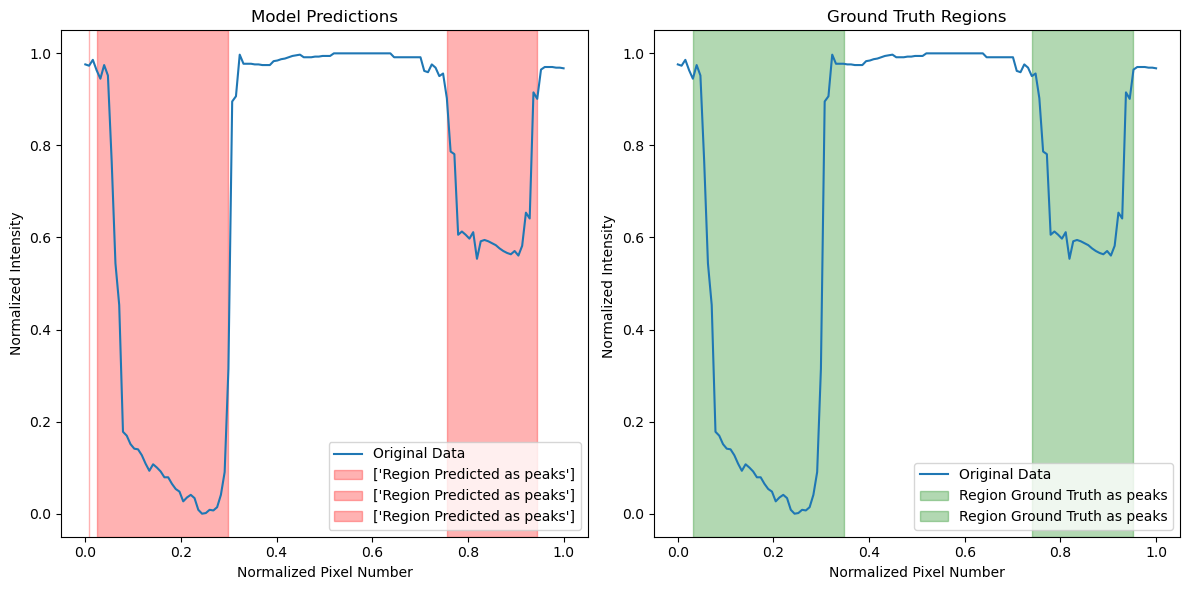

Accuracy: 0.91
Precision: 0.97
Recall (TP/(TP+FN)): 0.87
F1 Score (harmonic mean of precision and recall): 0.92
15-100-_jpg.rf.581d24df3ee9c7fdc3e4071eb108248e.jpg.txt_labeled.txt
(103, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 592us/step


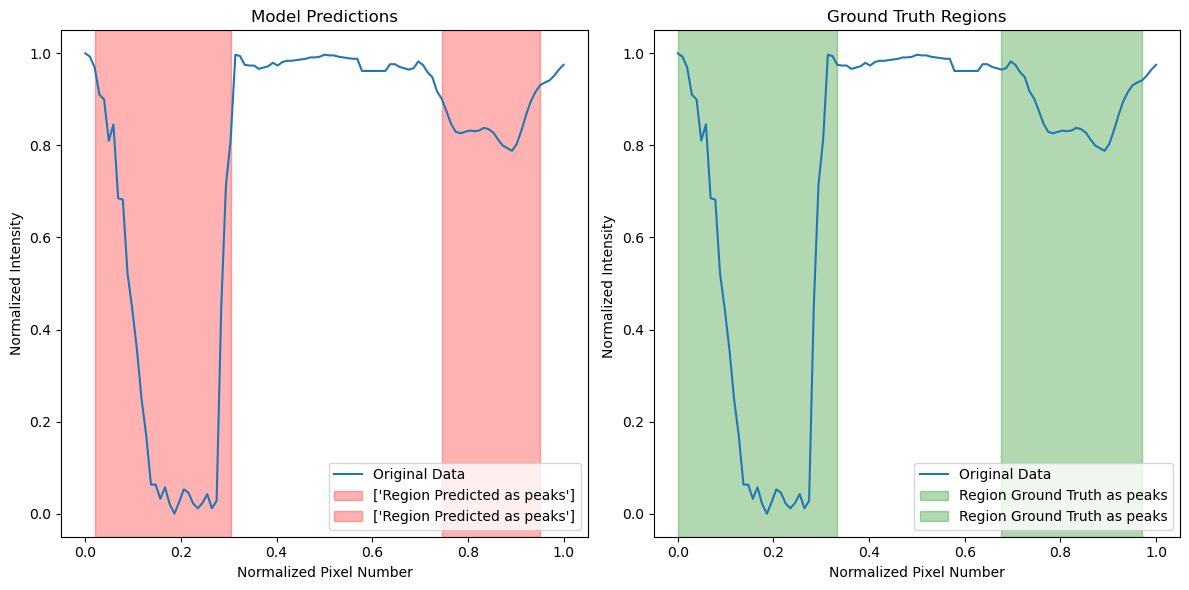

Accuracy: 0.86
Precision: 1.00
Recall (TP/(TP+FN)): 0.79
F1 Score (harmonic mean of precision and recall): 0.88
1-10_jpg.rf.14a5b0c36a913e8b2755f83daed41bb5.jpg.txt_labeled.txt
(79, 3)
<class 'numpy.ndarray'>
3/3 [==============================] - 0s 658us/step


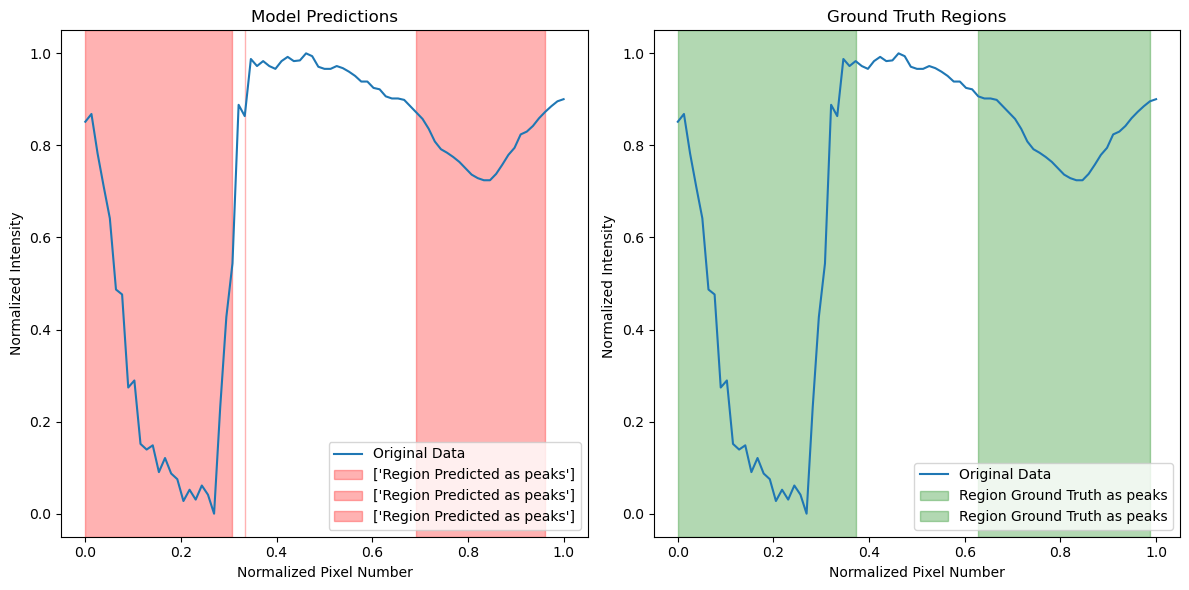

Accuracy: 0.86
Precision: 1.00
Recall (TP/(TP+FN)): 0.81
F1 Score (harmonic mean of precision and recall): 0.90
61-15_jpg.rf.78a966dc2d2b2514dfc01f39bcfcf0ff.jpg.txt_labeled.txt
(101, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 578us/step


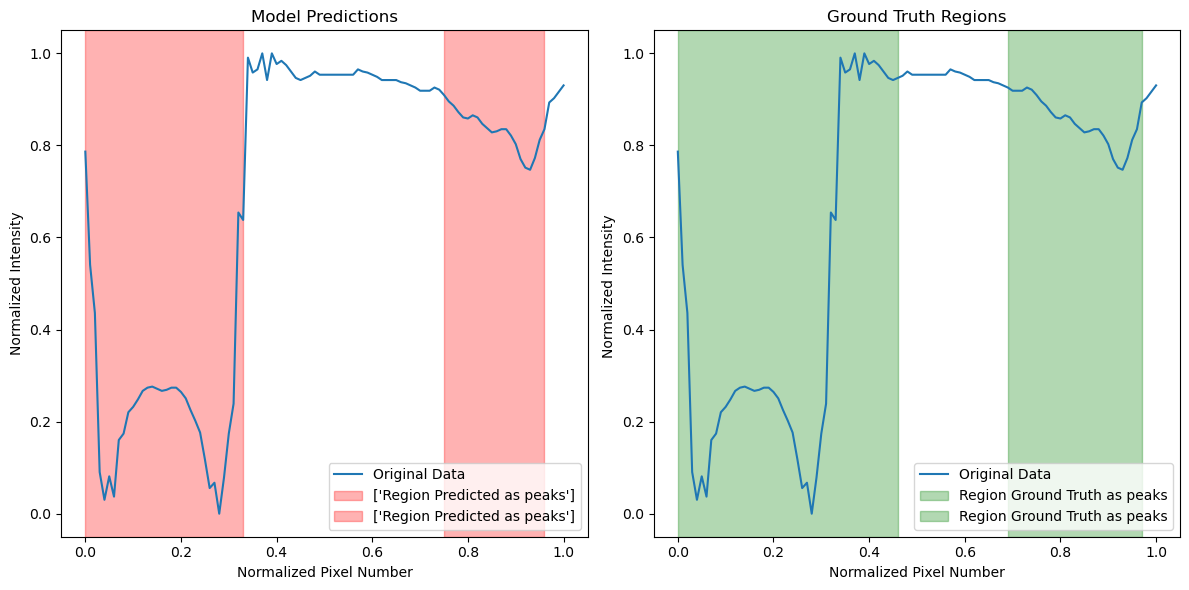

Accuracy: 0.80
Precision: 1.00
Recall (TP/(TP+FN)): 0.74
F1 Score (harmonic mean of precision and recall): 0.85
38-50_jpg.rf.794bdacb26991cd60ad1a988deee4207.jpg.txt_labeled.txt
(128, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 566us/step


Accuracy: 0.92
Precision: 0.94
Recall (TP/(TP+FN)): 0.94
F1 Score (harmonic mean of precision and recall): 0.94
3-500_jpg.rf.0a7a47766e13b867af651164a2f5035c.jpg.txt_labeled.txt
(105, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 580us/step


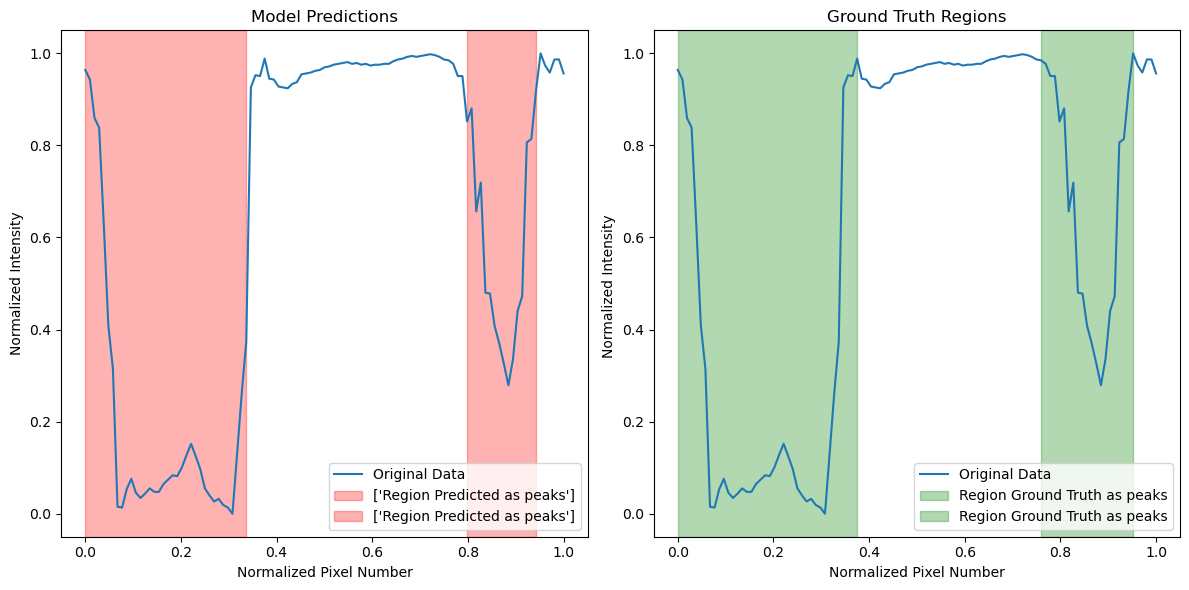

Accuracy: 0.91
Precision: 1.00
Recall (TP/(TP+FN)): 0.85
F1 Score (harmonic mean of precision and recall): 0.92
27-10-_jpg.rf.9bb15cdc5879a7c9647ad0fc63944858.jpg.txt_labeled.txt
(166, 3)
<class 'numpy.ndarray'>
6/6 [==============================] - 0s 487us/step


Accuracy: 0.70
Precision: 0.67
Recall (TP/(TP+FN)): 1.00
F1 Score (harmonic mean of precision and recall): 0.80
29-250-_jpg.rf.df6d5bc08bbab05e9dbb4e52522a5872.jpg.txt_labeled.txt
(95, 3)
<class 'numpy.ndarray'>
3/3 [==============================] - 0s 881us/step


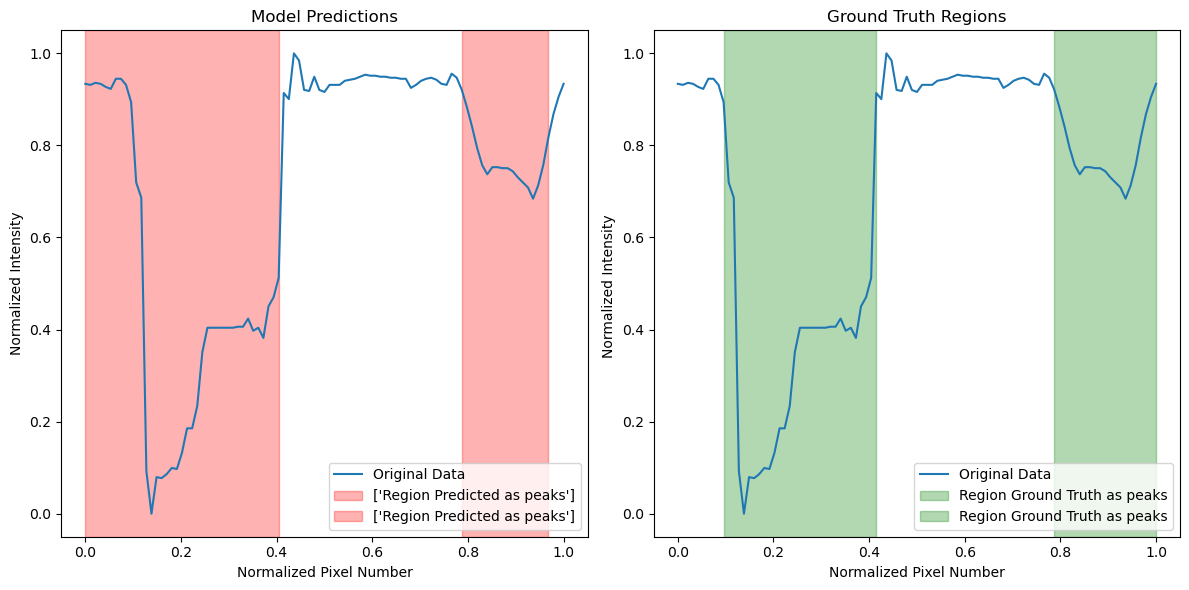

Accuracy: 0.86
Precision: 0.84
Recall (TP/(TP+FN)): 0.92
F1 Score (harmonic mean of precision and recall): 0.88
45-500_jpg.rf.988650109723c08d06f1689d4a00ec65.jpg.txt_labeled.txt
(92, 3)
<class 'numpy.ndarray'>
3/3 [==============================] - 0s 2ms/step


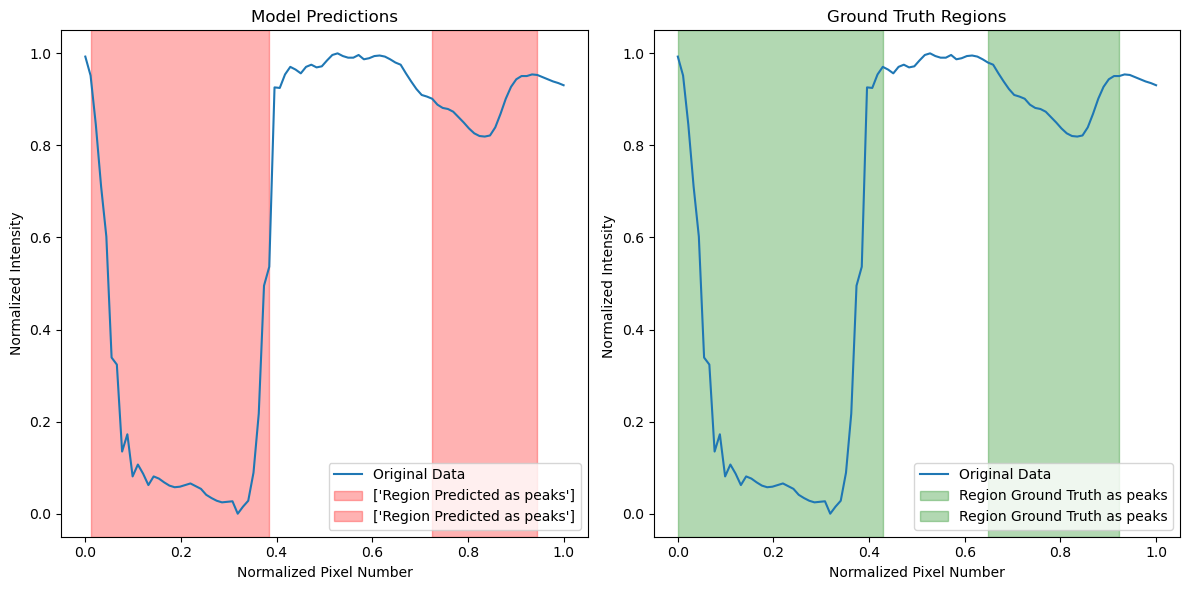

Accuracy: 0.85
Precision: 0.96
Recall (TP/(TP+FN)): 0.82
F1 Score (harmonic mean of precision and recall): 0.89
7-500_jpg.rf.bdc4f2ae09af1efafaeae238a83b48f7.jpg.txt_labeled.txt
(106, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 1ms/step


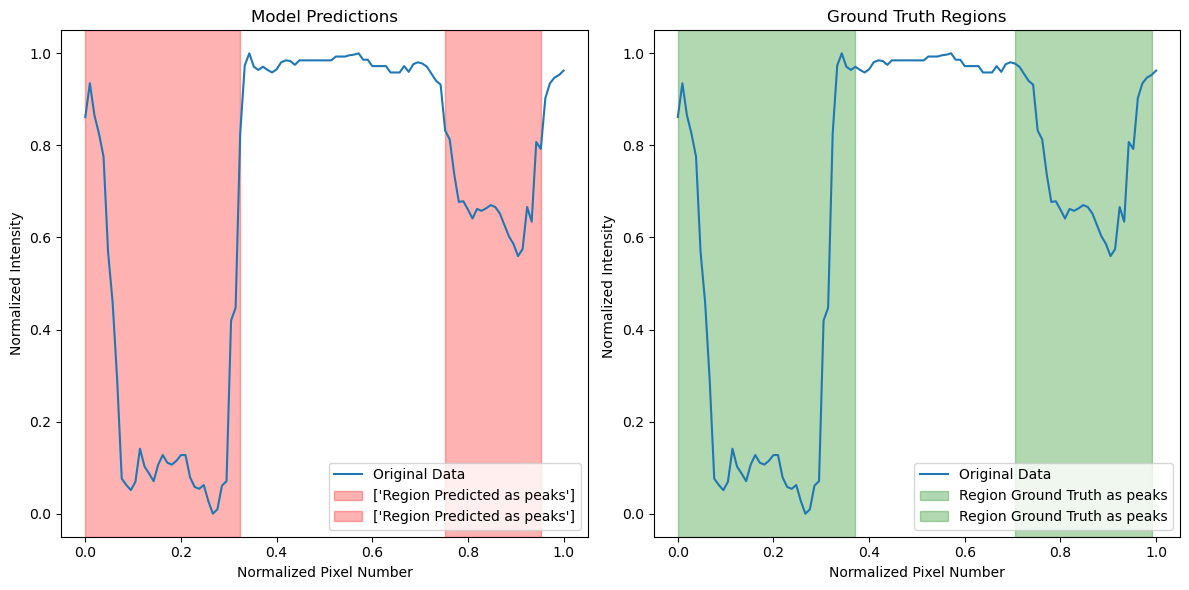

Accuracy: 0.87
Precision: 1.00
Recall (TP/(TP+FN)): 0.80
F1 Score (harmonic mean of precision and recall): 0.89
25-250_jpg.rf.39756a6796a05b00486c33a9169a2629.jpg.txt_labeled.txt
(124, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 593us/step


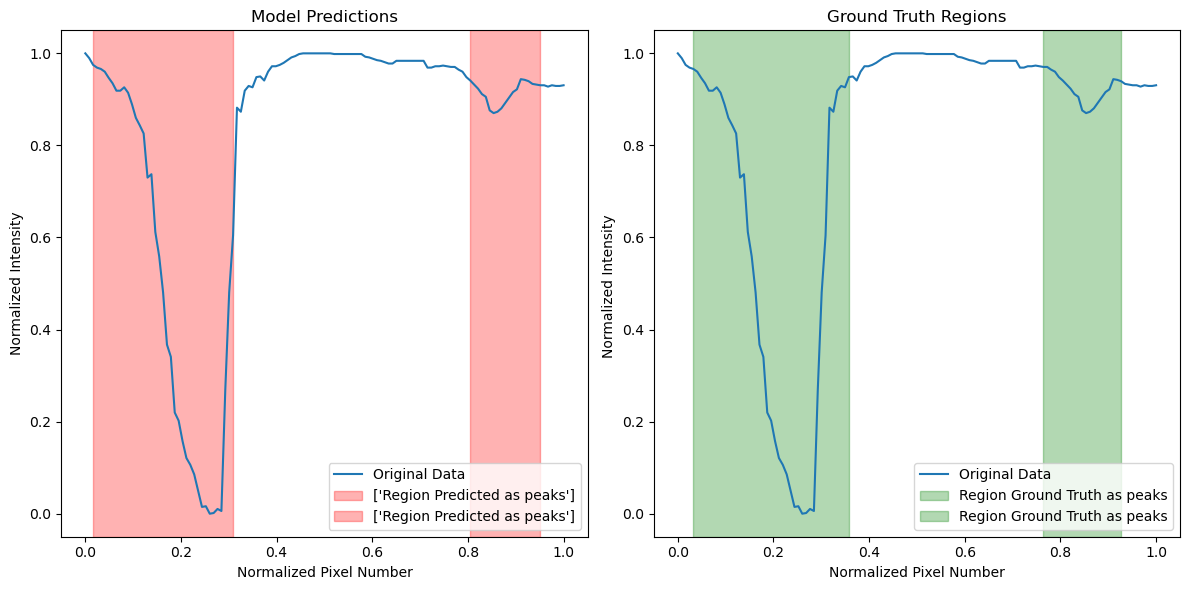

Accuracy: 0.87
Precision: 0.91
Recall (TP/(TP+FN)): 0.82
F1 Score (harmonic mean of precision and recall): 0.86
8-500-_jpg.rf.5c7e3adcbe6635791a288664ddd756a0.jpg.txt_labeled.txt
(163, 3)
<class 'numpy.ndarray'>
6/6 [==============================] - 0s 486us/step


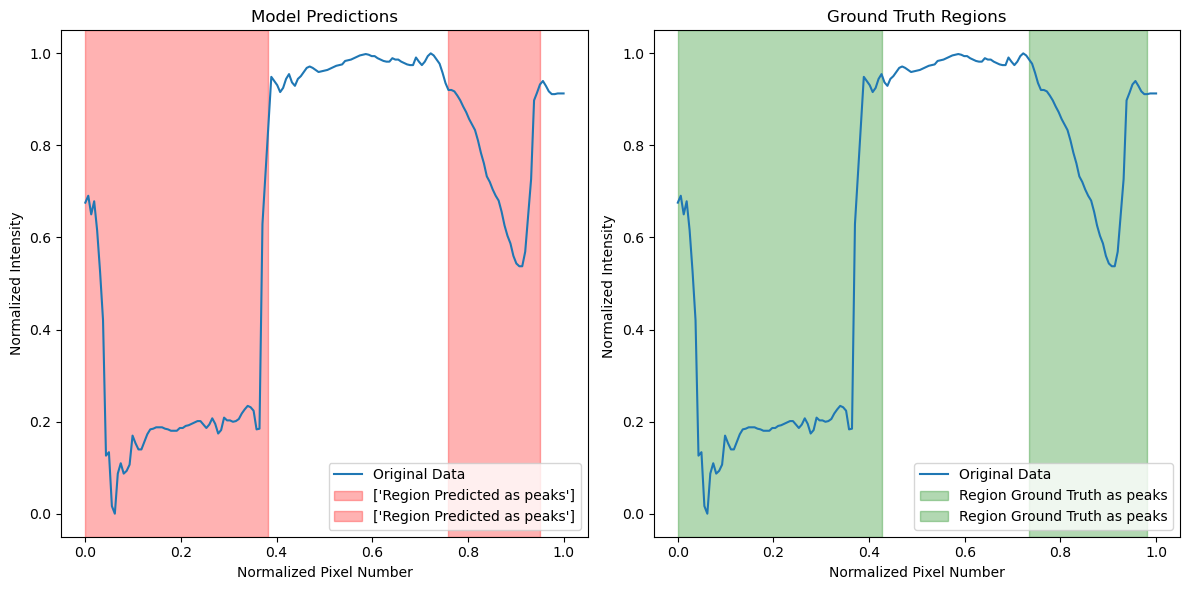

Accuracy: 0.90
Precision: 1.00
Recall (TP/(TP+FN)): 0.86
F1 Score (harmonic mean of precision and recall): 0.92
46-500_jpg.rf.f9a31060b4f0e933cd16d2bb38538c33.jpg.txt_labeled.txt
(112, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 619us/step


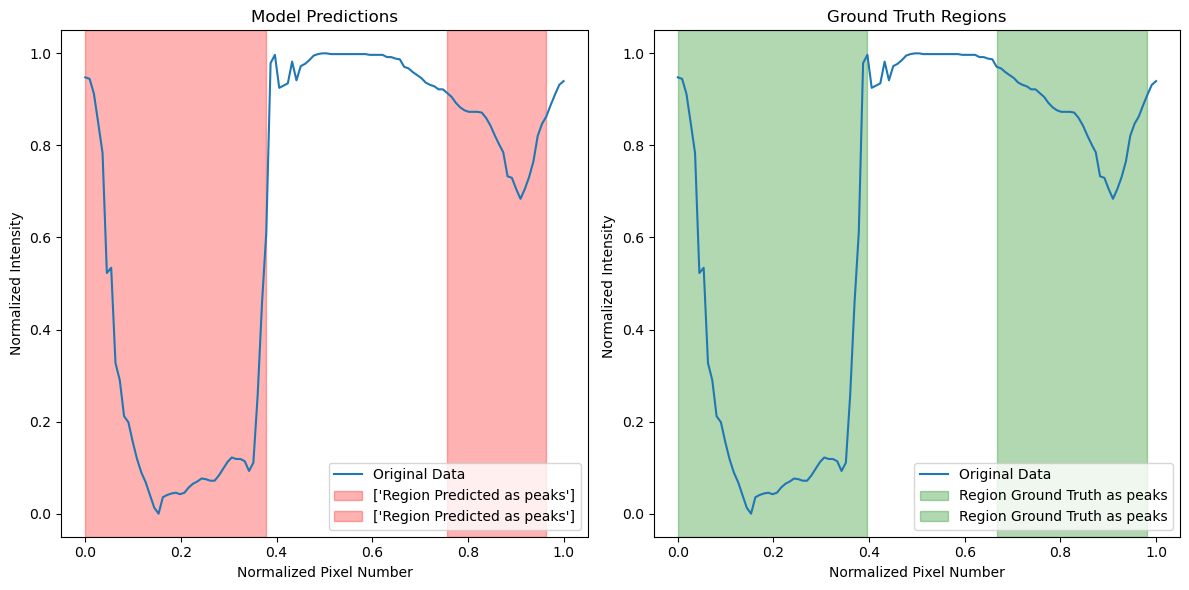

Accuracy: 0.88
Precision: 1.00
Recall (TP/(TP+FN)): 0.83
F1 Score (harmonic mean of precision and recall): 0.91
49-15_jpg.rf.cfc5c48a026a960b951384dc765c02d8.jpg.txt_labeled.txt
(115, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 590us/step


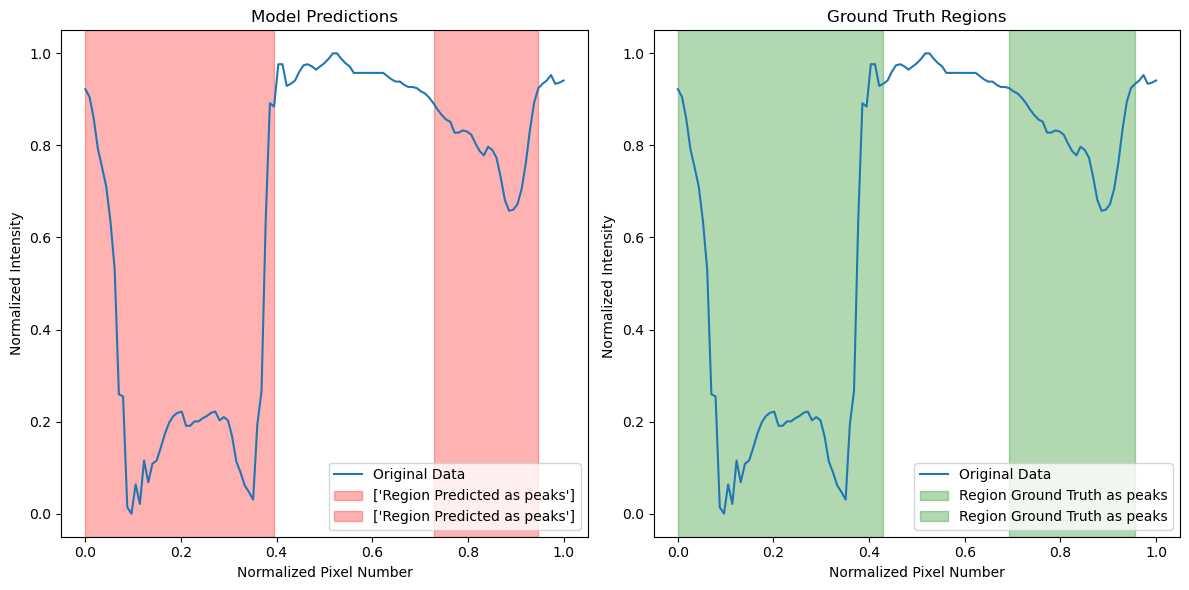

Accuracy: 0.92
Precision: 1.00
Recall (TP/(TP+FN)): 0.89
F1 Score (harmonic mean of precision and recall): 0.94
14-0_jpg.rf.0128bc9a4d7db070232dd070b273e30b.jpg.txt_labeled.txt
(117, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 599us/step


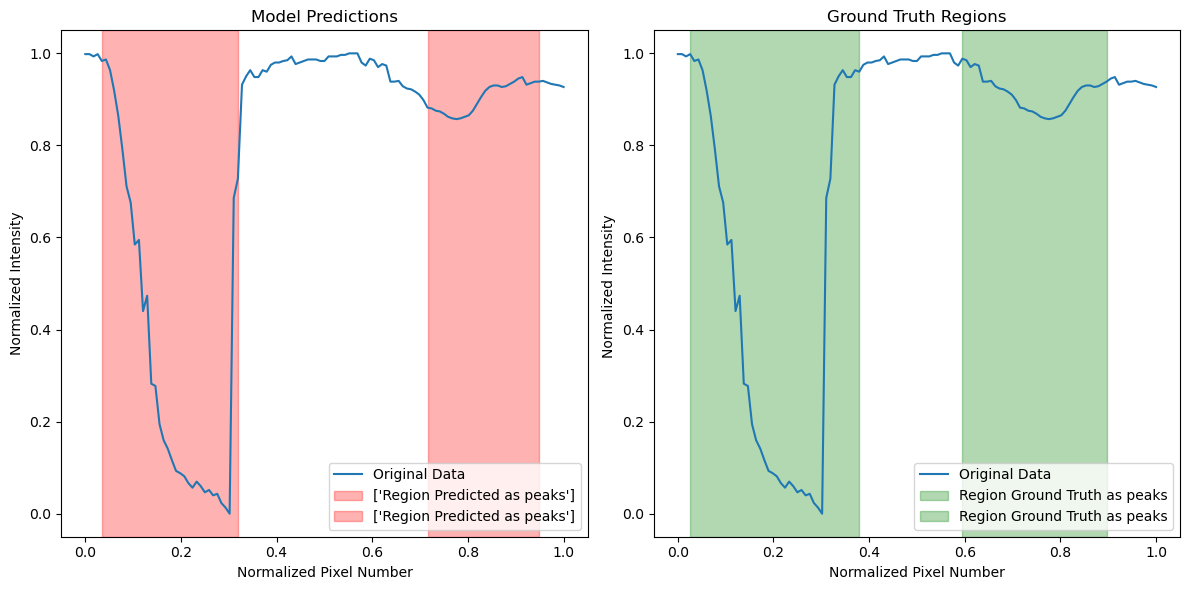

Accuracy: 0.76
Precision: 0.90
Recall (TP/(TP+FN)): 0.72
F1 Score (harmonic mean of precision and recall): 0.80
52-250_jpg.rf.883ae8947763929e53ae42b30d044e76.jpg.txt_labeled.txt
(126, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 585us/step


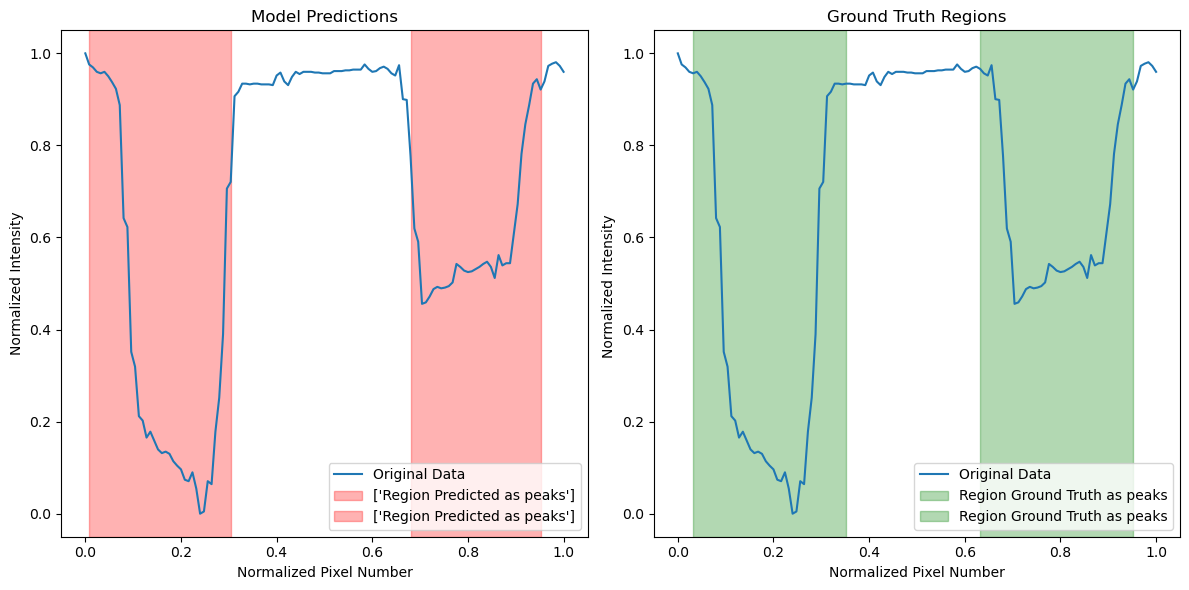

Accuracy: 0.88
Precision: 0.96
Recall (TP/(TP+FN)): 0.85
F1 Score (harmonic mean of precision and recall): 0.90
29-100_jpg.rf.927899ccd4228ad9f7e54f2a781c6eaa.jpg.txt_labeled.txt
(101, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 538us/step


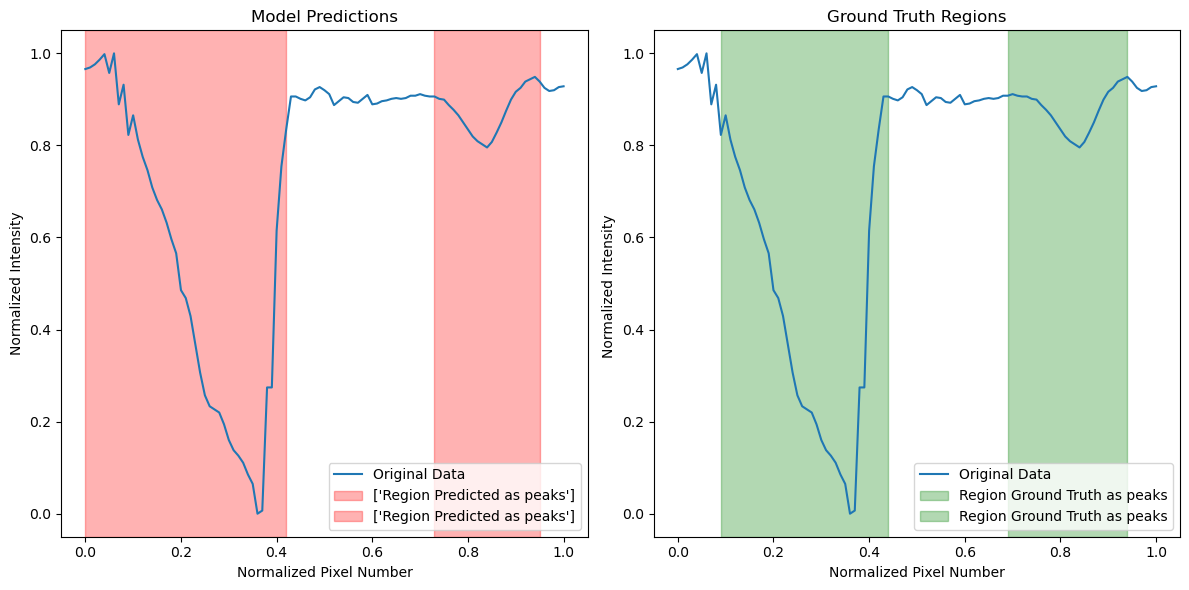

Accuracy: 0.84
Precision: 0.85
Recall (TP/(TP+FN)): 0.90
F1 Score (harmonic mean of precision and recall): 0.88
54-10_jpg.rf.d8797c8622418c7a2dae20fc39c5ebf6.jpg.txt_labeled.txt
(162, 3)
<class 'numpy.ndarray'>
6/6 [==============================] - 0s 500us/step


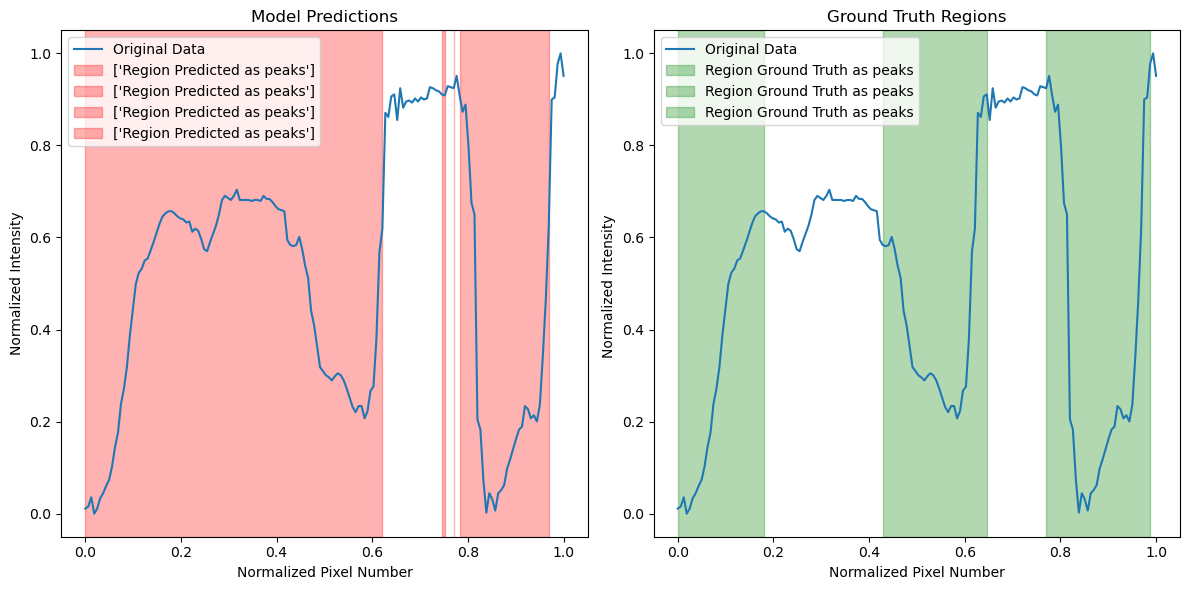

Accuracy: 0.70
Precision: 0.70
Recall (TP/(TP+FN)): 0.92
F1 Score (harmonic mean of precision and recall): 0.79
23-50_jpg.rf.4a85e9e98da9aebe0086c85a8e0f5528.jpg.txt_labeled.txt
(115, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 586us/step


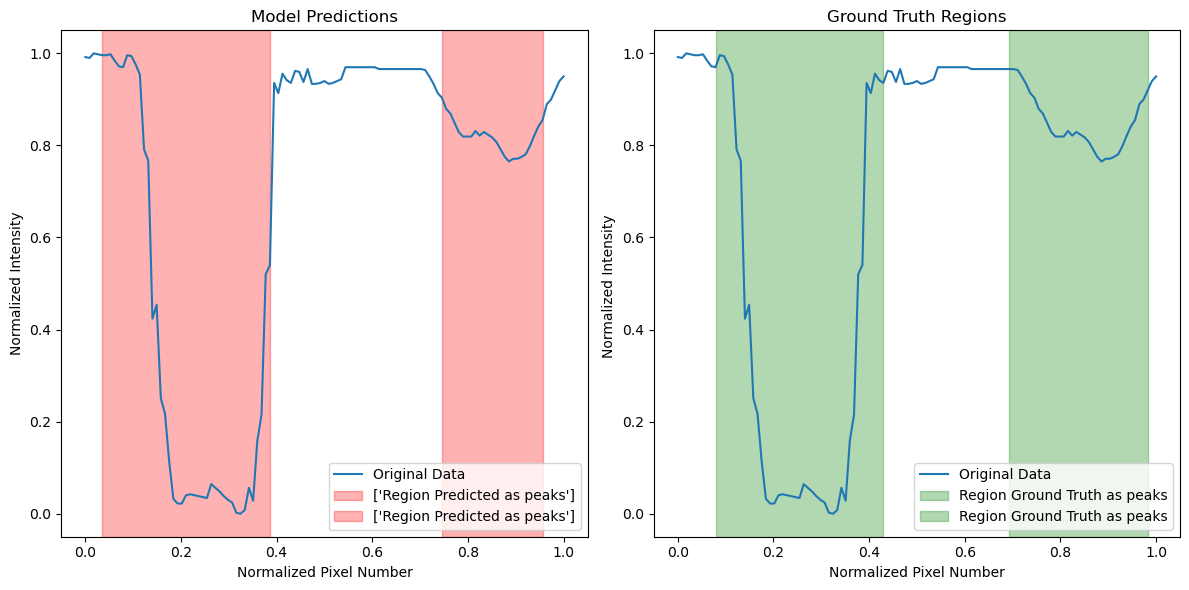

Accuracy: 0.83
Precision: 0.92
Recall (TP/(TP+FN)): 0.81
F1 Score (harmonic mean of precision and recall): 0.87
49-250_jpg.rf.d2e5e9b8cade70fea188425fa439e7ab.jpg.txt_labeled.txt
(105, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 584us/step


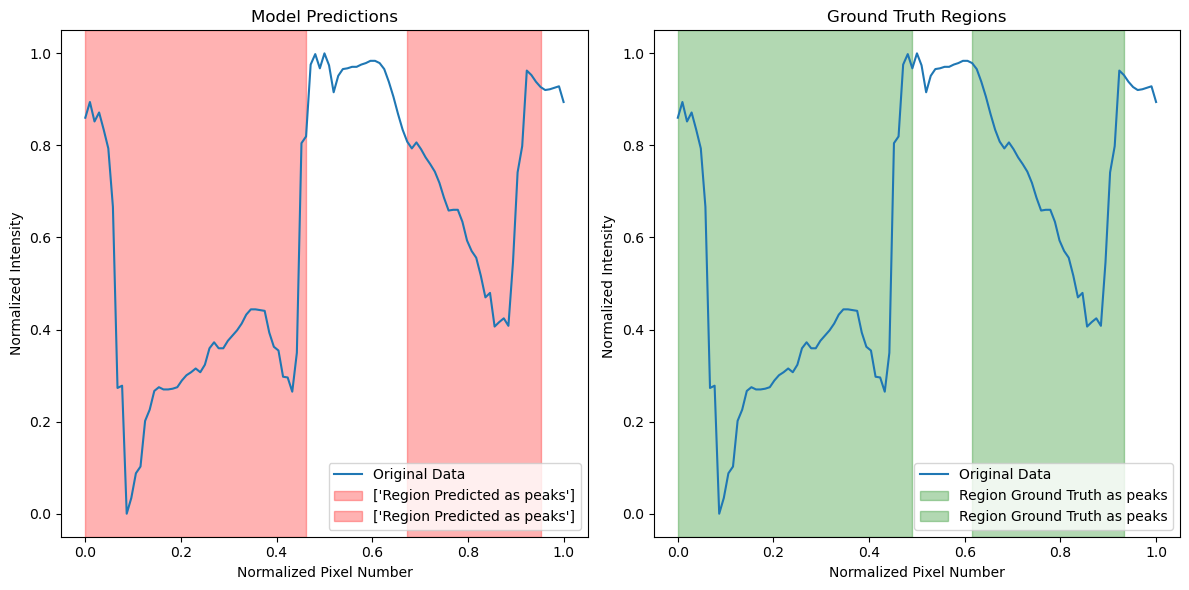

Accuracy: 0.90
Precision: 0.97
Recall (TP/(TP+FN)): 0.90
F1 Score (harmonic mean of precision and recall): 0.93
20-250_jpg.rf.cc7326c4532db509530fb6910c91a45b.jpg.txt_labeled.txt
(108, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 553us/step


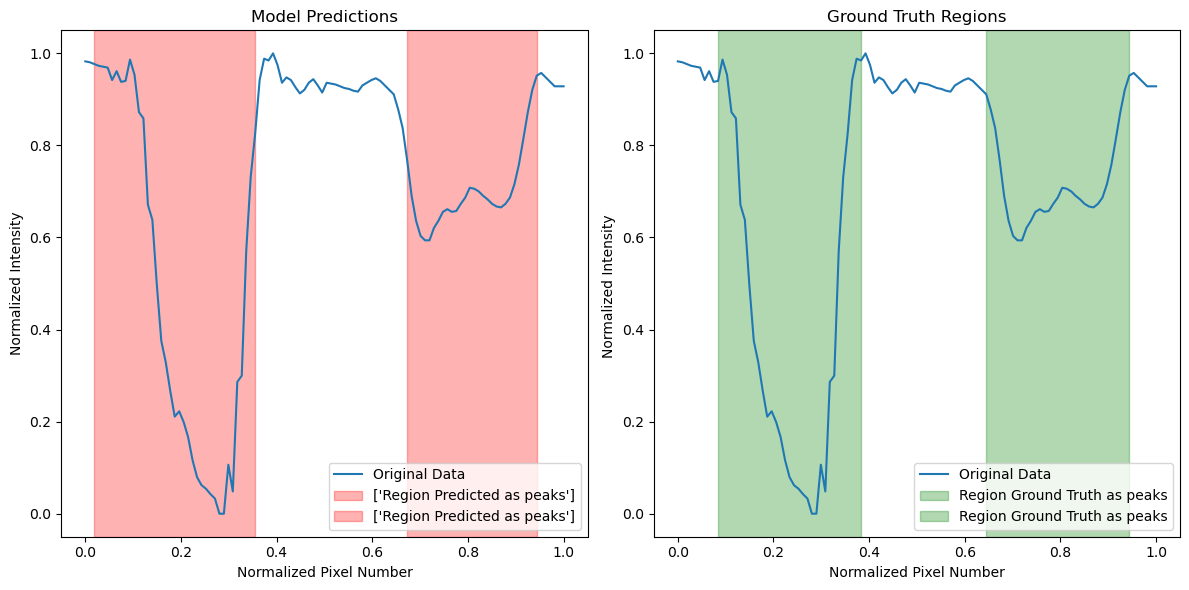

Accuracy: 0.88
Precision: 0.90
Recall (TP/(TP+FN)): 0.91
F1 Score (harmonic mean of precision and recall): 0.90
27-100_jpg.rf.9f7cc1460296729dab4f33d6c622723f.jpg.txt_labeled.txt
(155, 3)
<class 'numpy.ndarray'>
5/5 [==============================] - 0s 633us/step


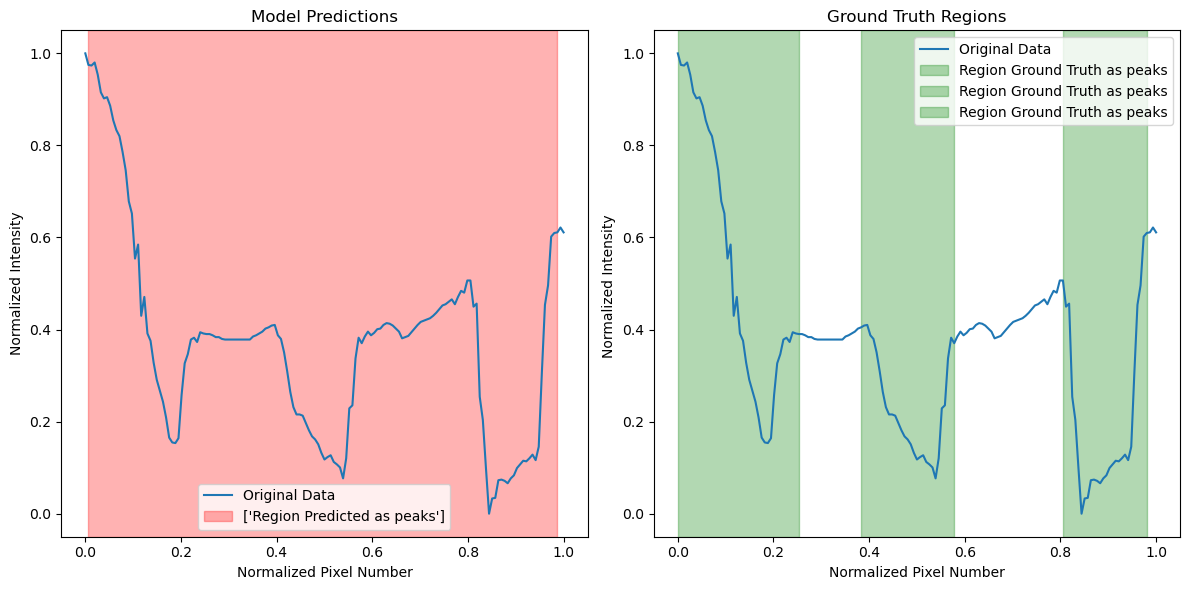

Accuracy: 0.65
Precision: 0.64
Recall (TP/(TP+FN)): 0.99
F1 Score (harmonic mean of precision and recall): 0.78
60-250_jpg.rf.32a9cd11ab7421b8489000ba6c766980.jpg.txt_labeled.txt
(110, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 597us/step


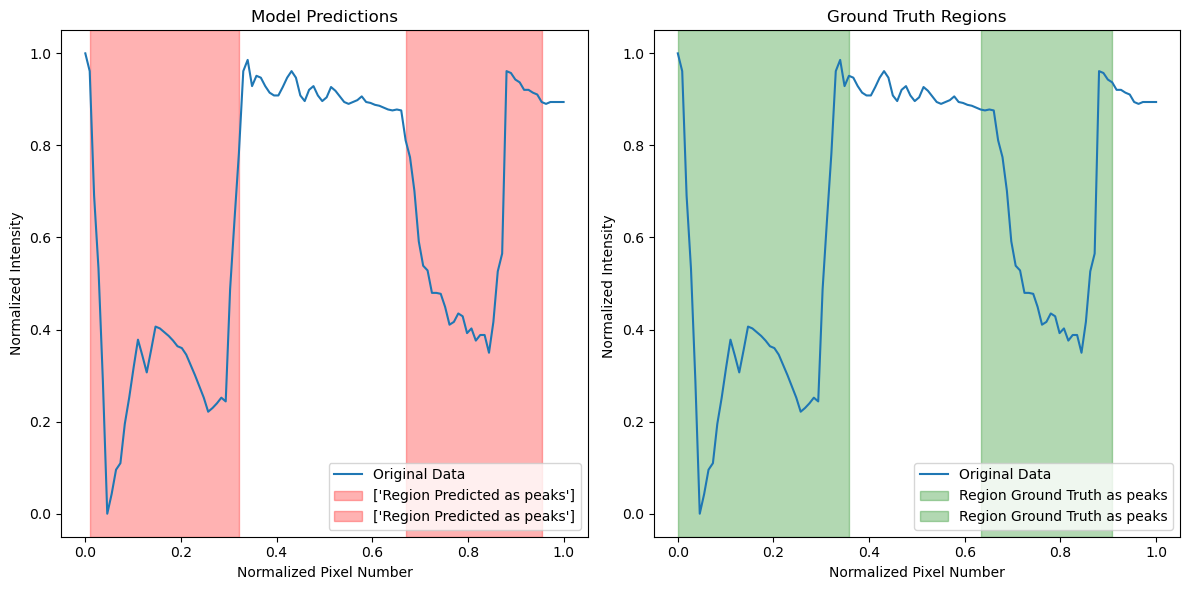

Accuracy: 0.87
Precision: 0.93
Recall (TP/(TP+FN)): 0.87
F1 Score (harmonic mean of precision and recall): 0.90
36-0-5_jpg.rf.3a9456996a433153e60e64e19aa149df.jpg.txt_labeled.txt
(143, 3)
<class 'numpy.ndarray'>
5/5 [==============================] - 0s 550us/step


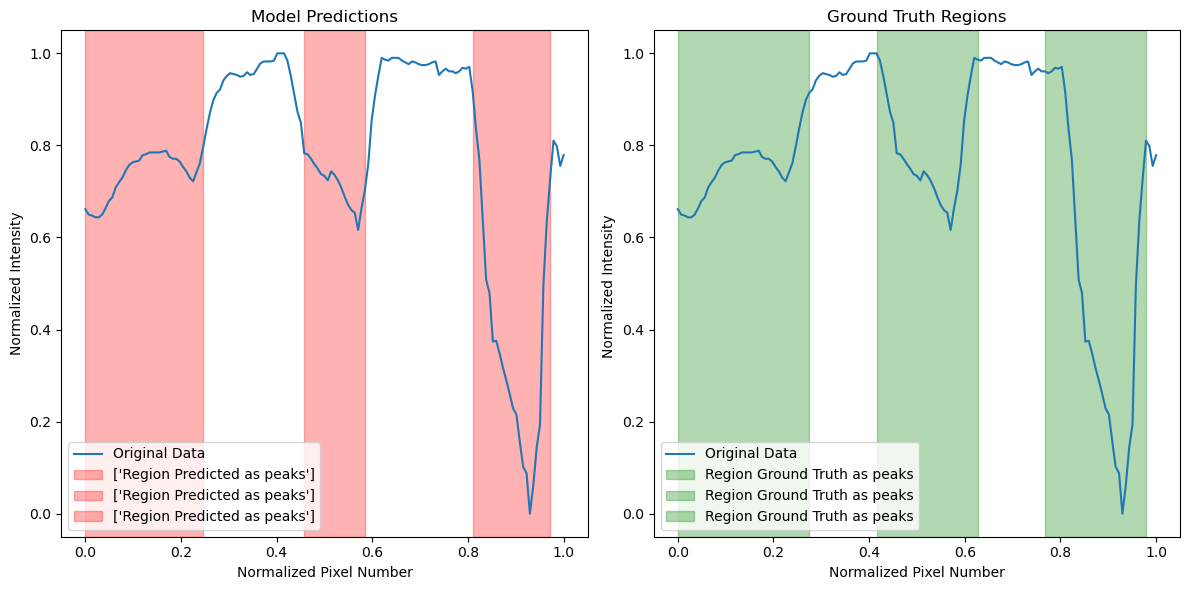

Accuracy: 0.84
Precision: 1.00
Recall (TP/(TP+FN)): 0.77
F1 Score (harmonic mean of precision and recall): 0.87
55-5-_jpg.rf.8e55a0753204aeecdf31746aea12bf65.jpg.txt_labeled.txt
(152, 3)
<class 'numpy.ndarray'>
5/5 [==============================] - 0s 557us/step


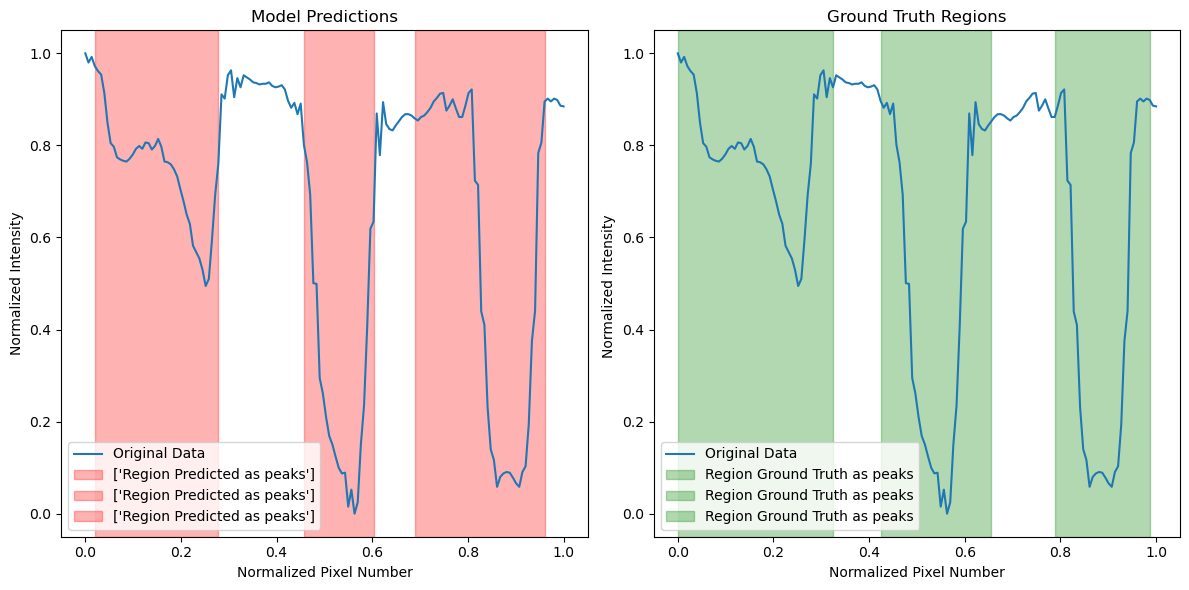

Accuracy: 0.72
Precision: 0.86
Recall (TP/(TP+FN)): 0.77
F1 Score (harmonic mean of precision and recall): 0.81
12-25-_jpg.rf.afcb601c7caf7ed55c2d70ba794acaff.jpg.txt_labeled.txt
(112, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 565us/step


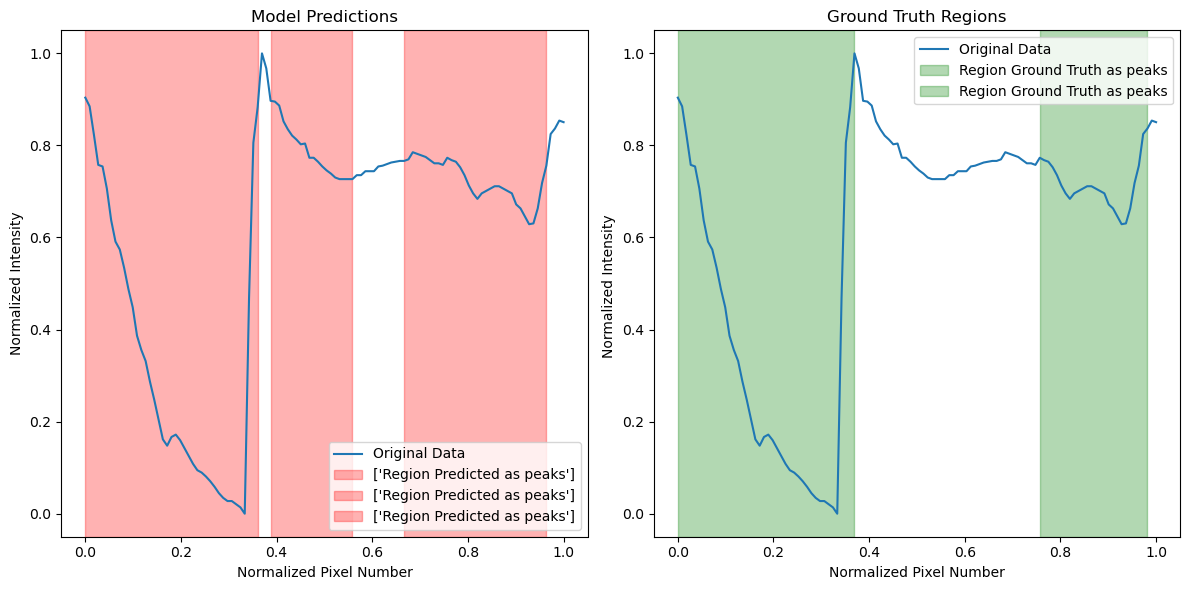

Accuracy: 0.71
Precision: 0.68
Recall (TP/(TP+FN)): 0.96
F1 Score (harmonic mean of precision and recall): 0.80
7-80-_jpg.rf.28584a08e5e46fc76beb9c564499048c.jpg.txt_labeled.txt
(103, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 596us/step


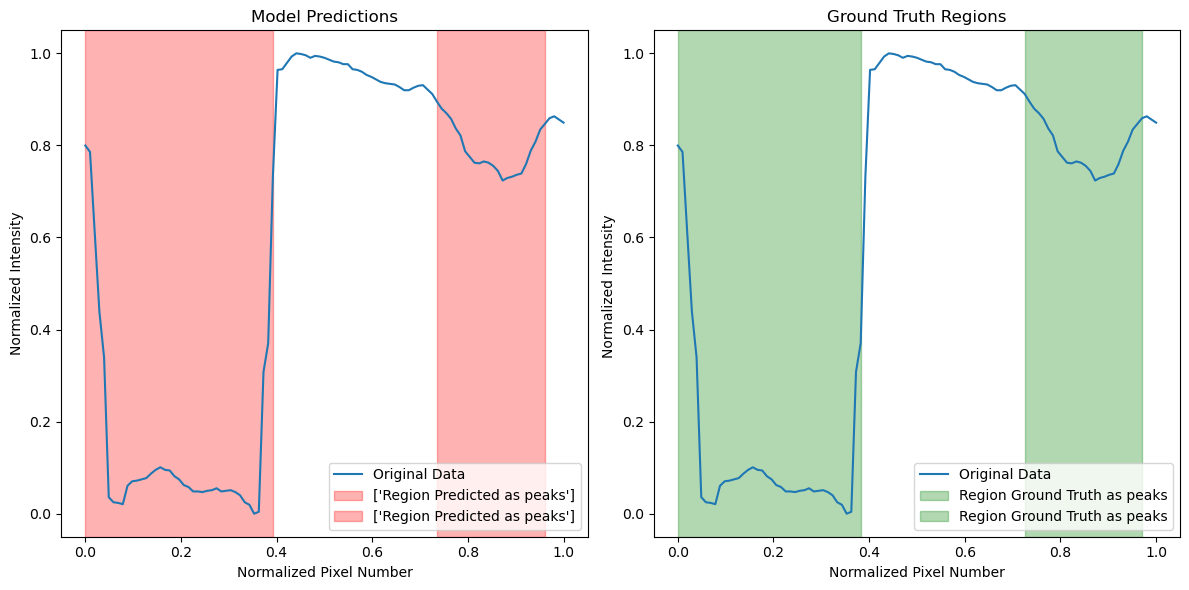

Accuracy: 0.97
Precision: 0.98
Recall (TP/(TP+FN)): 0.97
F1 Score (harmonic mean of precision and recall): 0.98
12-0-_jpg.rf.03fa00edb7c2537c7b975cc3370dc0ef.jpg.txt_labeled.txt
(111, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 595us/step


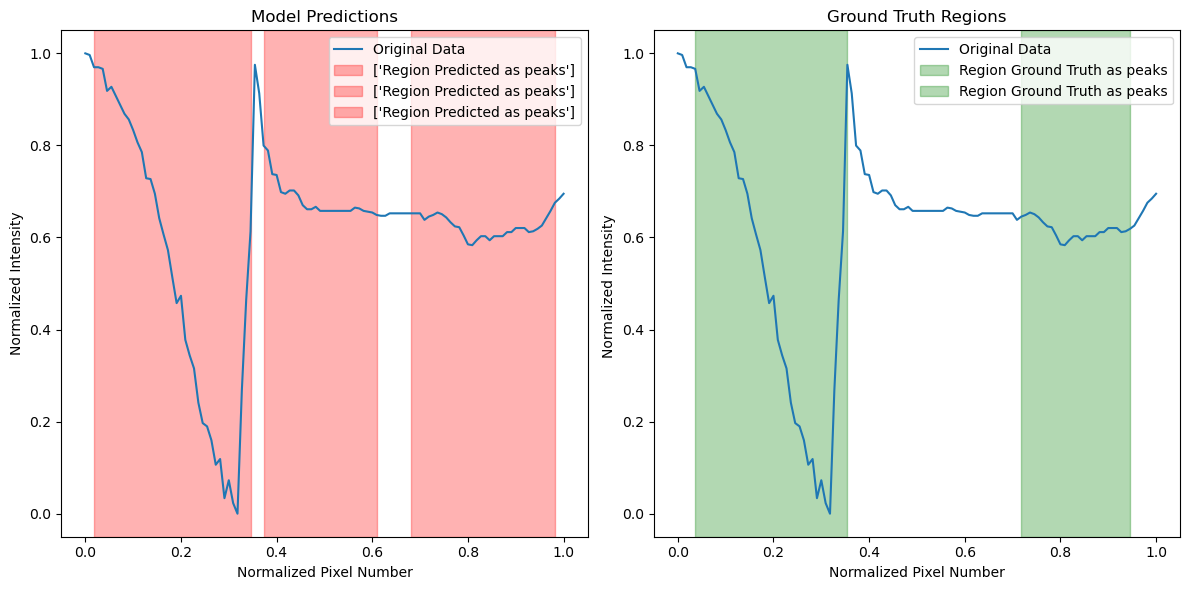

Accuracy: 0.66
Precision: 0.62
Recall (TP/(TP+FN)): 0.98
F1 Score (harmonic mean of precision and recall): 0.76
62-0-1_jpg.rf.d4724152970e9191208396c2cf81d9e9.jpg.txt_labeled.txt
(164, 3)
<class 'numpy.ndarray'>
6/6 [==============================] - 0s 488us/step


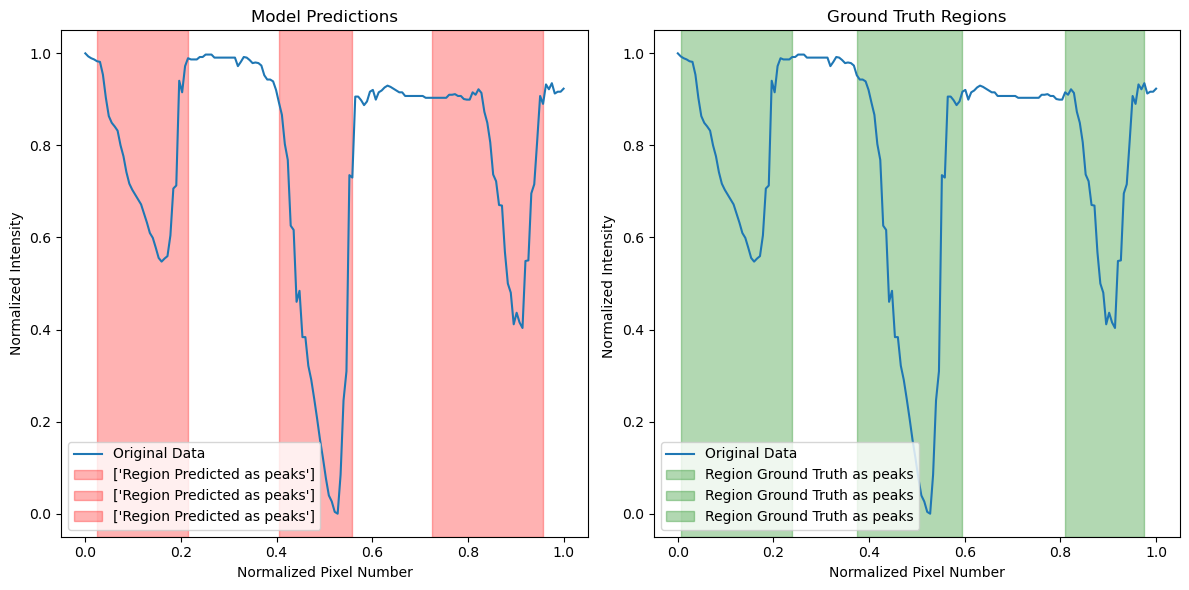

Accuracy: 0.79
Precision: 0.86
Recall (TP/(TP+FN)): 0.80
F1 Score (harmonic mean of precision and recall): 0.83
17-80_jpg.rf.9d910a305339837b0358ffa2bdd28160.jpg.txt_labeled.txt
(95, 3)
<class 'numpy.ndarray'>
3/3 [==============================] - 0s 653us/step


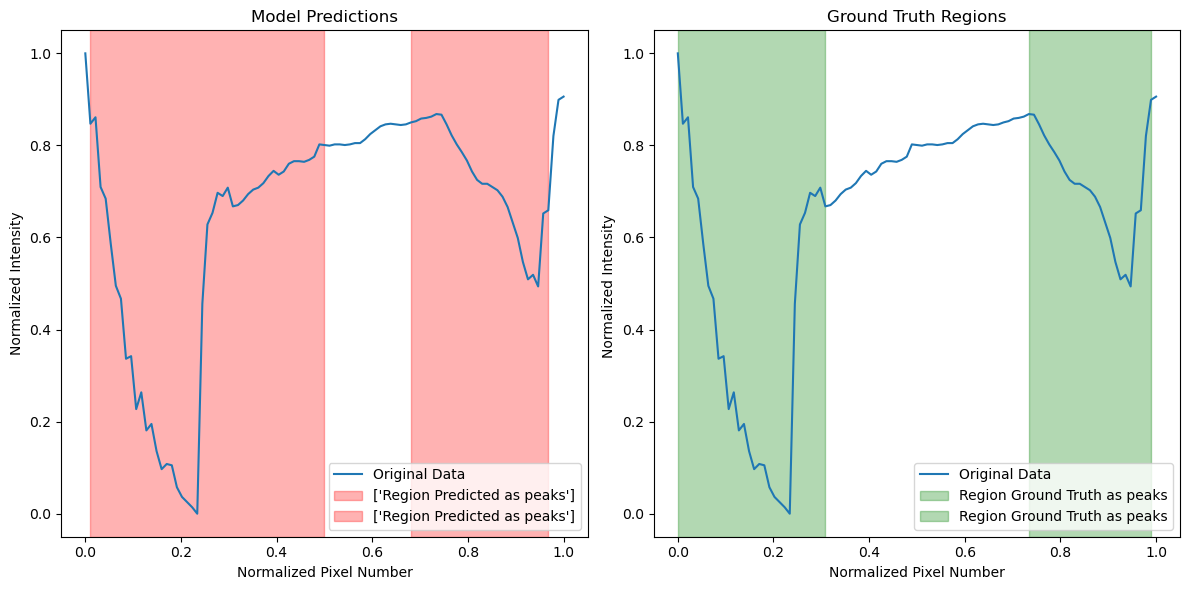

Accuracy: 0.73
Precision: 0.69
Recall (TP/(TP+FN)): 0.95
F1 Score (harmonic mean of precision and recall): 0.80
39-5_jpg.rf.4130cedb30acc3f0afd36ad122151934.jpg.txt_labeled.txt
(117, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 604us/step


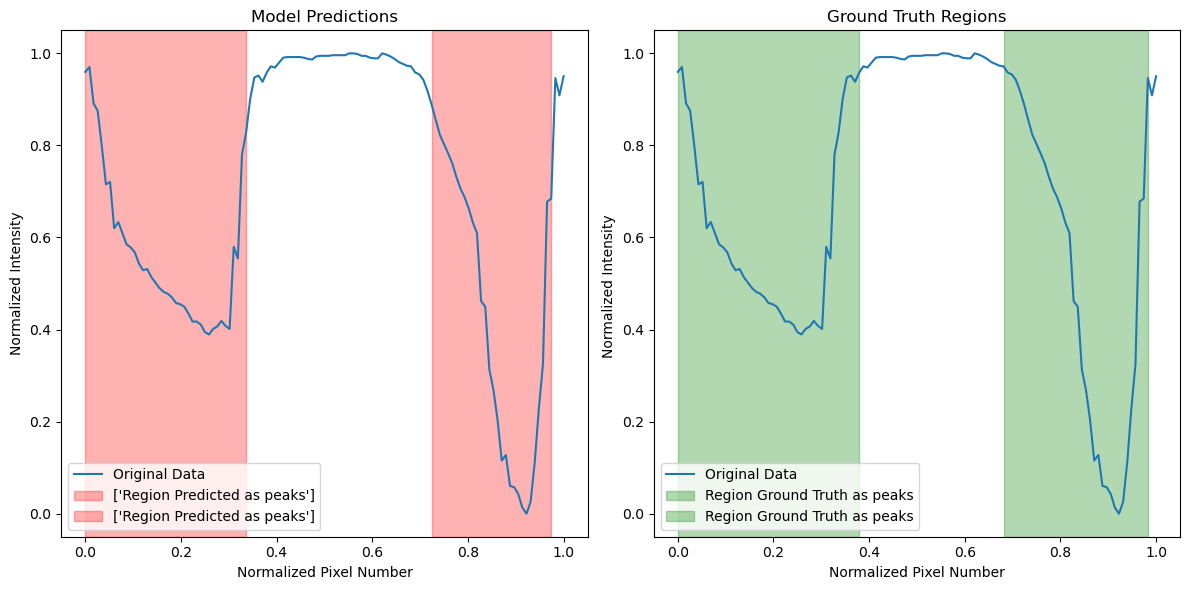

Accuracy: 0.91
Precision: 1.00
Recall (TP/(TP+FN)): 0.86
F1 Score (harmonic mean of precision and recall): 0.93
20-0-1_jpg.rf.ec3e743783f250747ac26c2c80a6bc56.jpg.txt_labeled.txt
(110, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 550us/step


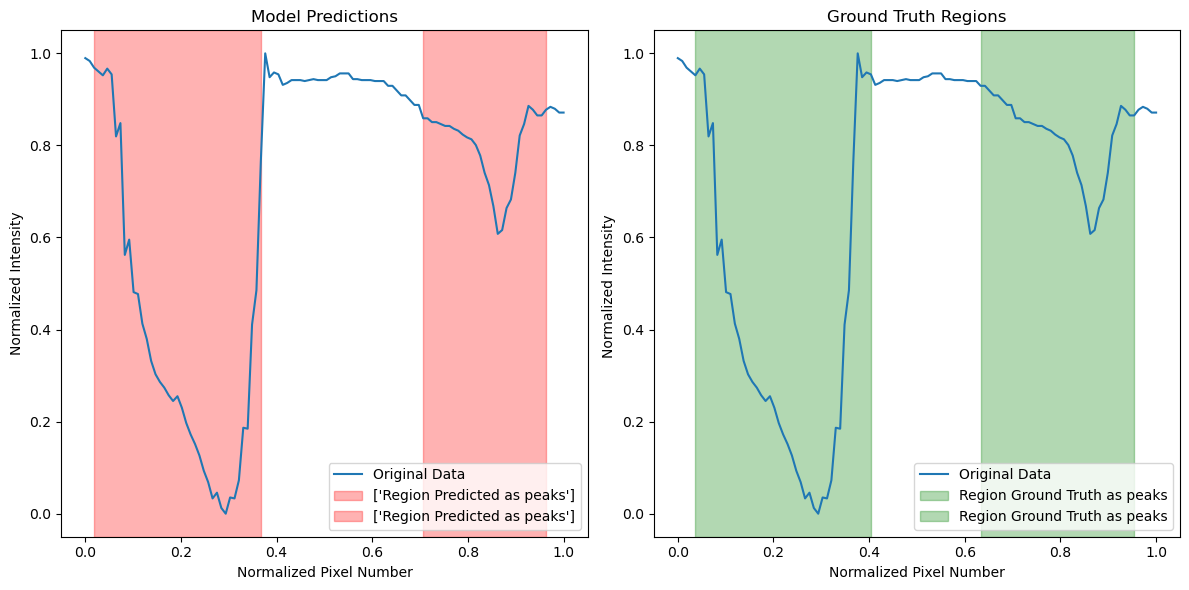

Accuracy: 0.86
Precision: 0.96
Recall (TP/(TP+FN)): 0.84
F1 Score (harmonic mean of precision and recall): 0.90
18-0_jpg.rf.1f75fc5b4d4614805e0518393d3305d5.jpg.txt_labeled.txt
(99, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 532us/step


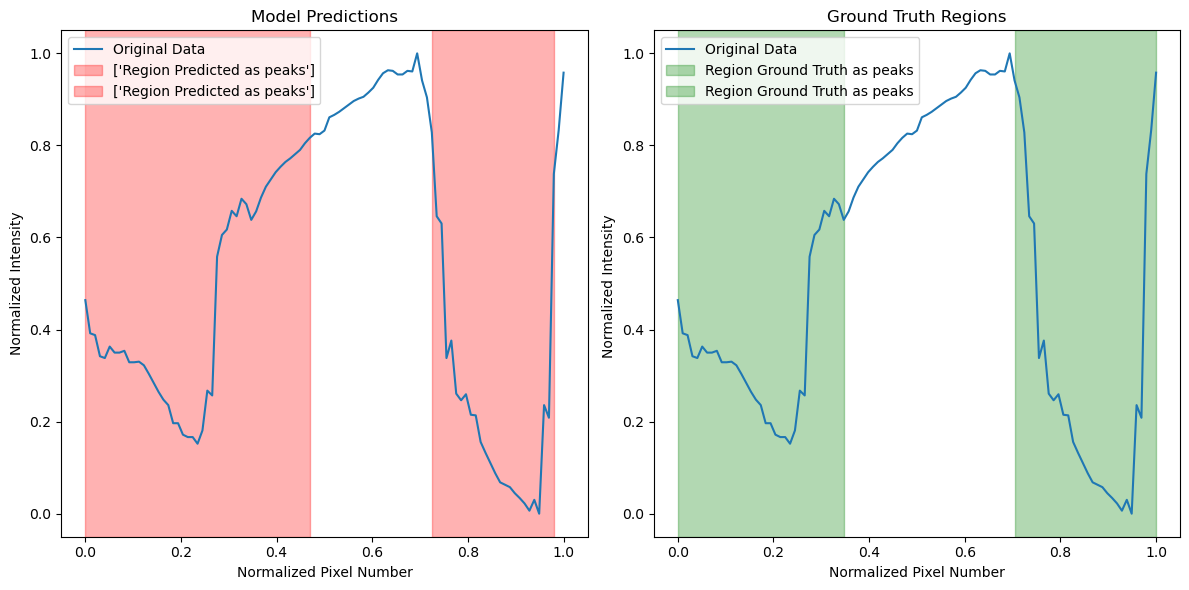

Accuracy: 0.84
Precision: 0.84
Recall (TP/(TP+FN)): 0.94
F1 Score (harmonic mean of precision and recall): 0.88
22-35_jpg.rf.899b1bf3e20c20f9999d2693e458856c.jpg.txt_labeled.txt
(88, 3)
<class 'numpy.ndarray'>
3/3 [==============================] - 0s 636us/step


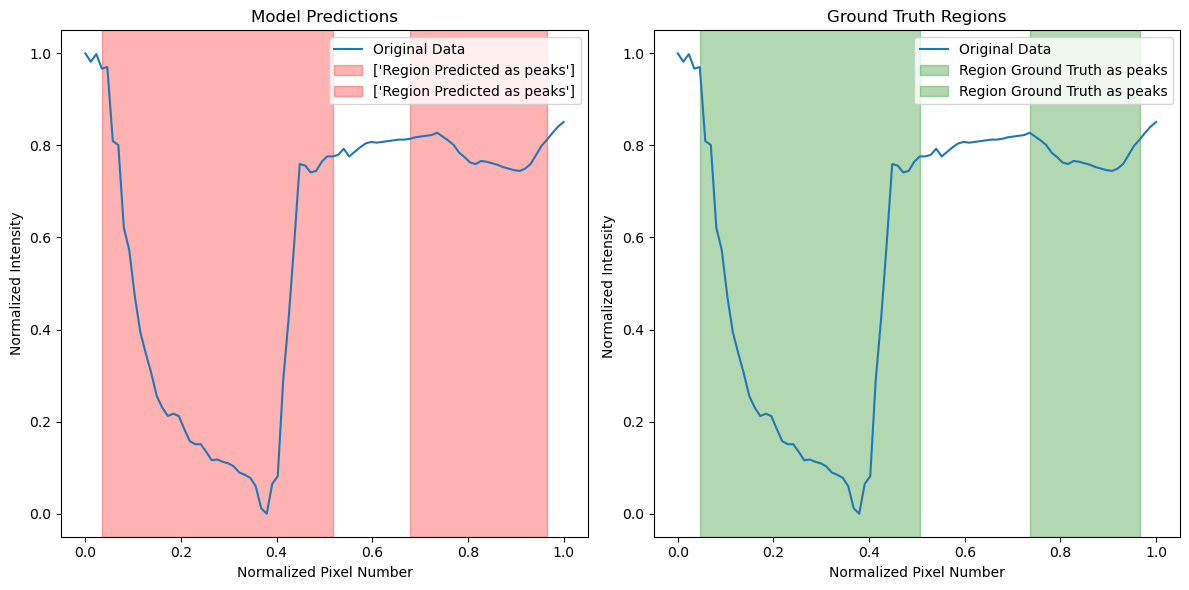

Accuracy: 0.92
Precision: 0.90
Recall (TP/(TP+FN)): 1.00
F1 Score (harmonic mean of precision and recall): 0.95
45-50-_jpg.rf.8c3dfb874e5d0b28a4b0183490fc6f7f.jpg.txt_labeled.txt
(85, 3)
<class 'numpy.ndarray'>
3/3 [==============================] - 0s 4ms/step


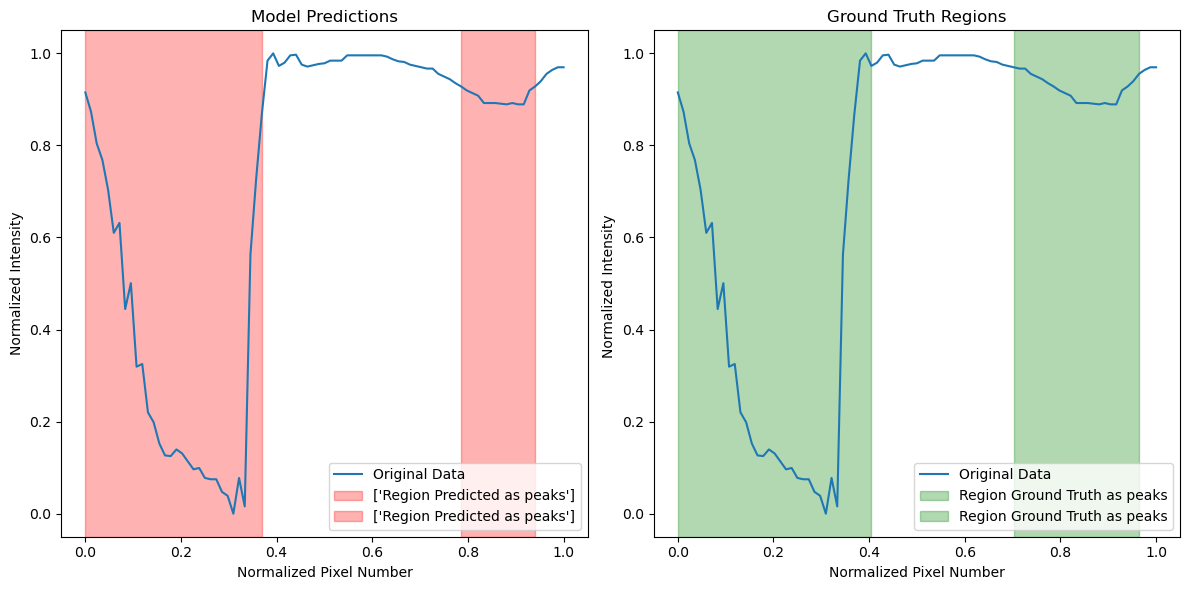

Accuracy: 0.86
Precision: 1.00
Recall (TP/(TP+FN)): 0.79
F1 Score (harmonic mean of precision and recall): 0.88
21-50_jpg.rf.8fa77371cf0ac709daa995c8c5ce5781.jpg.txt_labeled.txt
(104, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 1ms/step


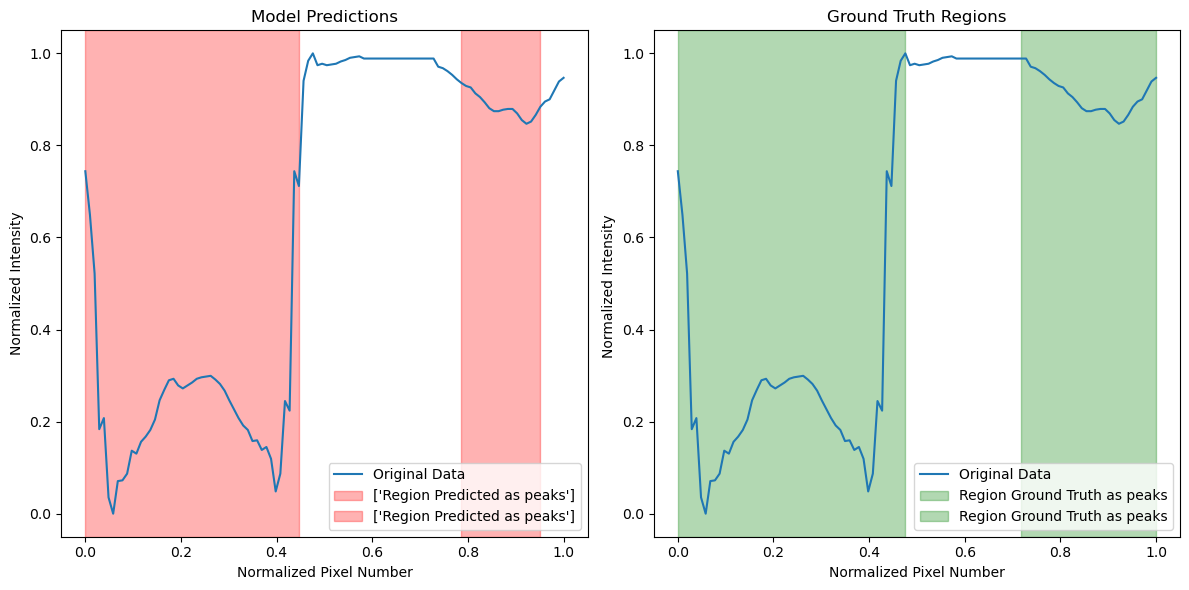

Accuracy: 0.86
Precision: 1.00
Recall (TP/(TP+FN)): 0.81
F1 Score (harmonic mean of precision and recall): 0.90
31-25_jpg.rf.f236e1ea2b99eb1cc6fedbd03b1488d4.jpg.txt_labeled.txt
(191, 3)
<class 'numpy.ndarray'>
6/6 [==============================] - 0s 791us/step


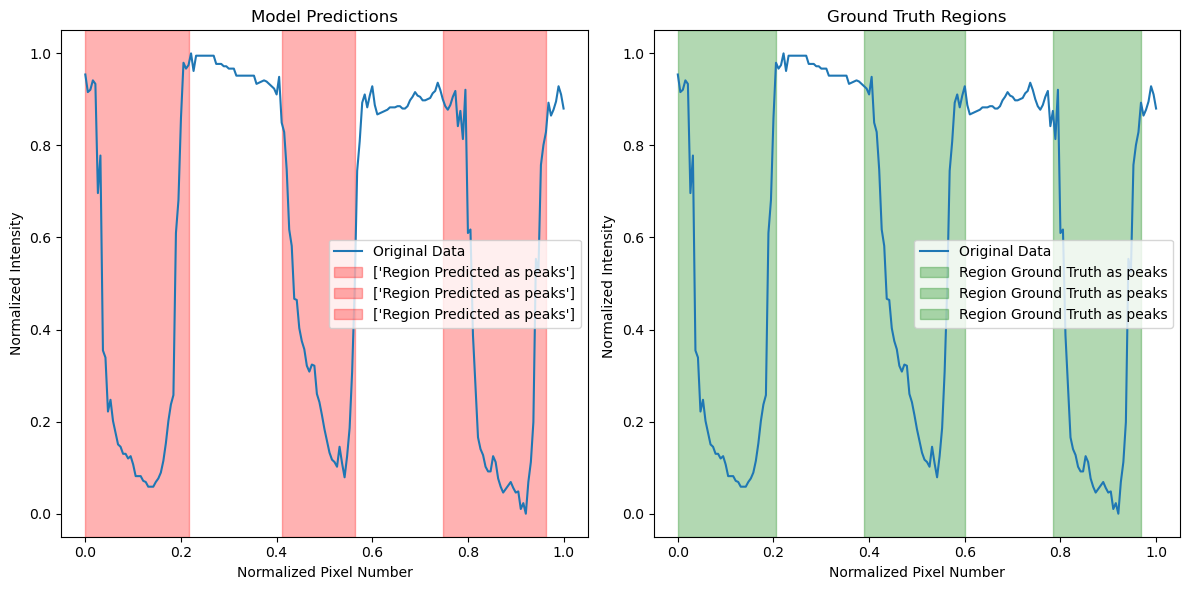

Accuracy: 0.89
Precision: 0.92
Recall (TP/(TP+FN)): 0.90
F1 Score (harmonic mean of precision and recall): 0.91
13-100_jpg.rf.12068f6ed153907db66066f1fe994502.jpg.txt_labeled.txt
(115, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 2ms/step


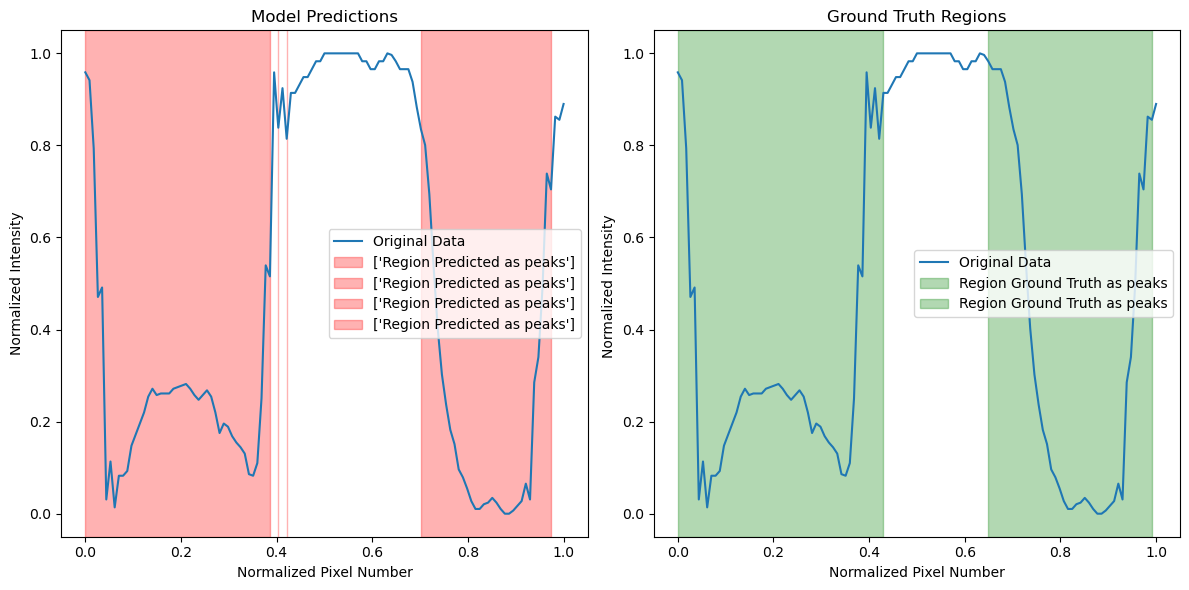

Accuracy: 0.90
Precision: 1.00
Recall (TP/(TP+FN)): 0.88
F1 Score (harmonic mean of precision and recall): 0.93
52-0-5_jpg.rf.5534f491c627b57cb99fa2decf3c9126.jpg.txt_labeled.txt
(113, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 792us/step


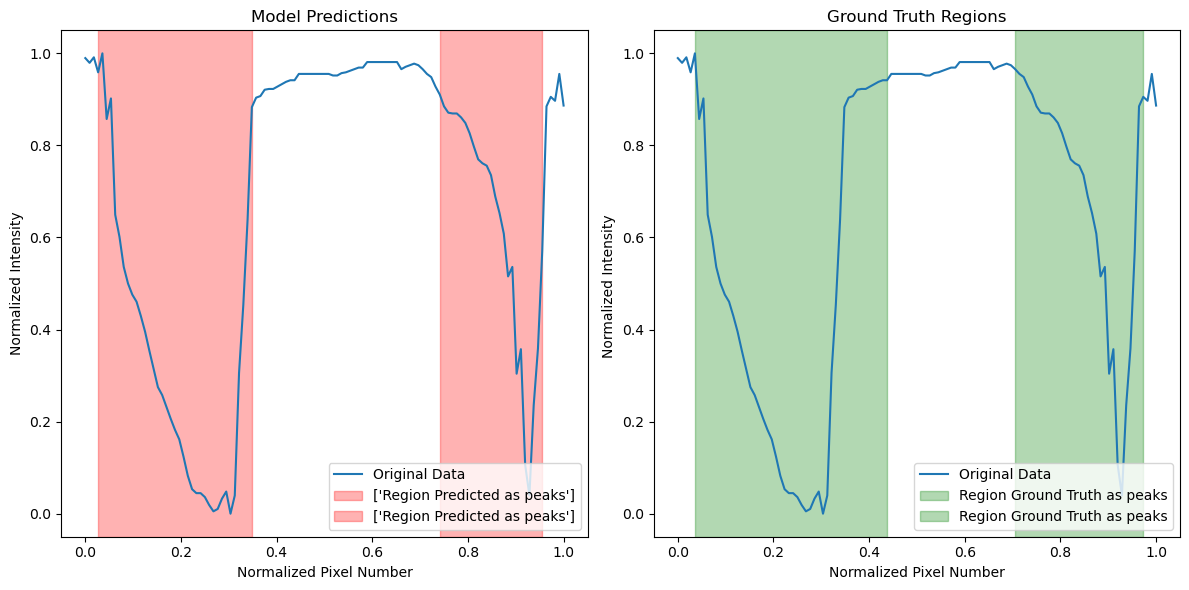

Accuracy: 0.85
Precision: 0.98
Recall (TP/(TP+FN)): 0.79
F1 Score (harmonic mean of precision and recall): 0.88
29-1000-_jpg.rf.e924359b3f7ed97d2b95f5f425ad95dd.jpg.txt_labeled.txt
(112, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 2ms/step


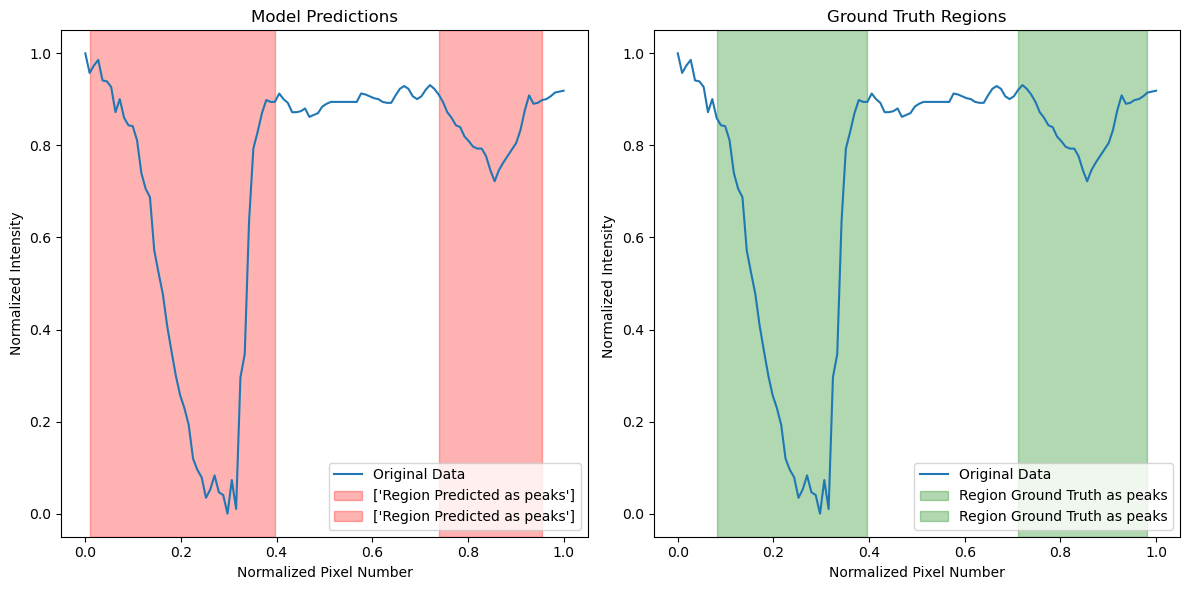

Accuracy: 0.88
Precision: 0.88
Recall (TP/(TP+FN)): 0.91
F1 Score (harmonic mean of precision and recall): 0.90
60-25-_jpg.rf.76117ae8f5239df9ad474e9d7f48659d.jpg.txt_labeled.txt
(119, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 761us/step


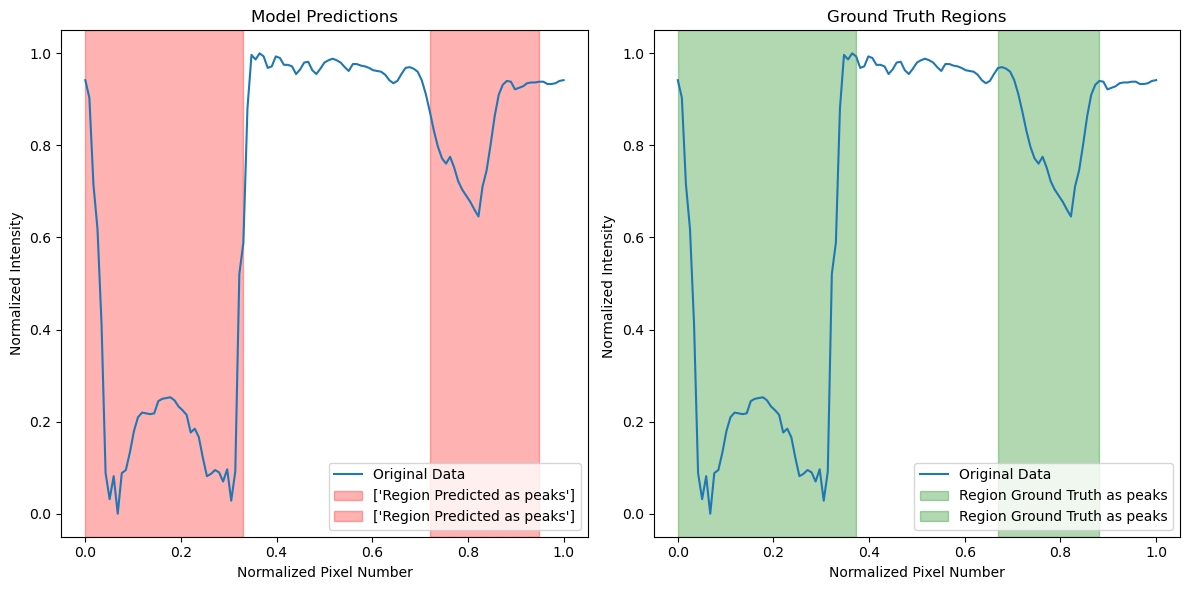

Accuracy: 0.84
Precision: 0.88
Recall (TP/(TP+FN)): 0.85
F1 Score (harmonic mean of precision and recall): 0.86
11-80_jpg.rf.19462a8a0ec57afc6a52c59bb2237fc8.jpg.txt_labeled.txt
(92, 3)
<class 'numpy.ndarray'>
3/3 [==============================] - 0s 2ms/step


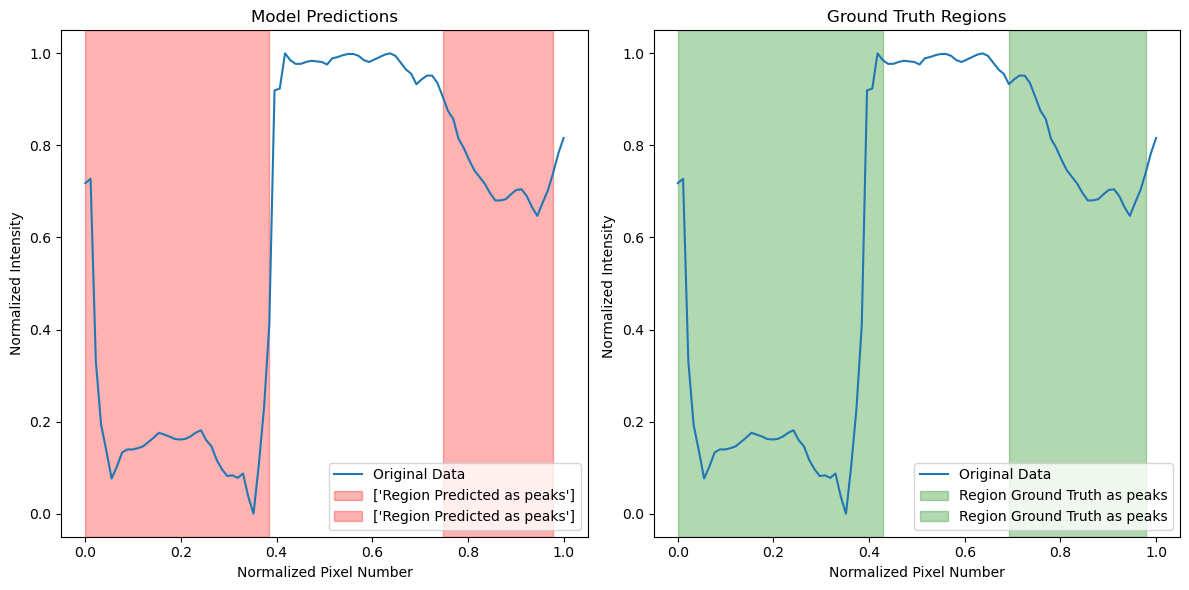

Accuracy: 0.90
Precision: 1.00
Recall (TP/(TP+FN)): 0.87
F1 Score (harmonic mean of precision and recall): 0.93
2-80_jpg.rf.7ba038e66b11f76d5d67ce35a5557c35.jpg.txt_labeled.txt
(90, 3)
<class 'numpy.ndarray'>
3/3 [==============================] - 0s 885us/step


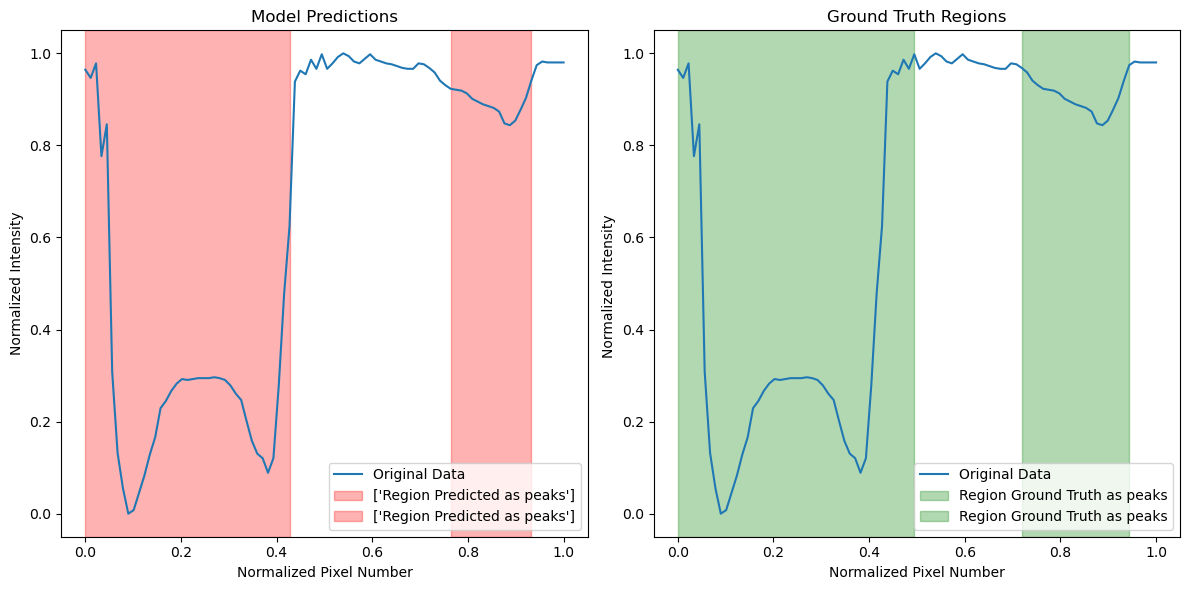

Accuracy: 0.88
Precision: 1.00
Recall (TP/(TP+FN)): 0.83
F1 Score (harmonic mean of precision and recall): 0.91
19-0-04_jpg.rf.1c965cd6817c90d78c8013c84e4a7420.jpg.txt_labeled.txt
(119, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 707us/step


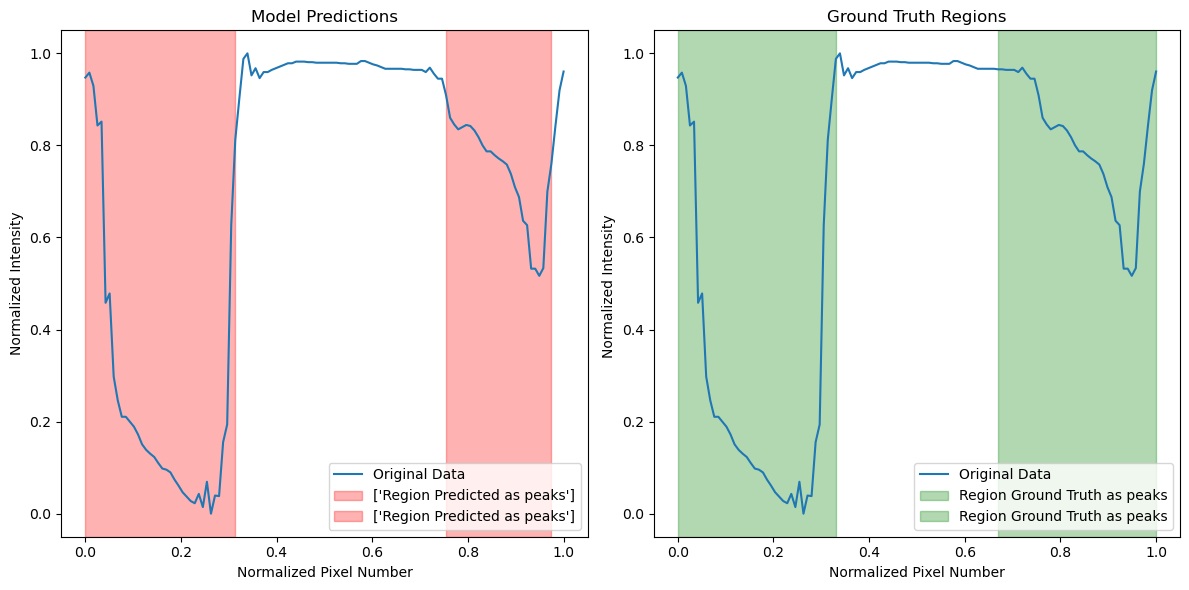

Accuracy: 0.87
Precision: 1.00
Recall (TP/(TP+FN)): 0.81
F1 Score (harmonic mean of precision and recall): 0.90
31-500_jpg.rf.973ef01a4a337e933a27bb9b7ecb37bd.jpg.txt_labeled.txt
(190, 3)
<class 'numpy.ndarray'>
6/6 [==============================] - 0s 554us/step


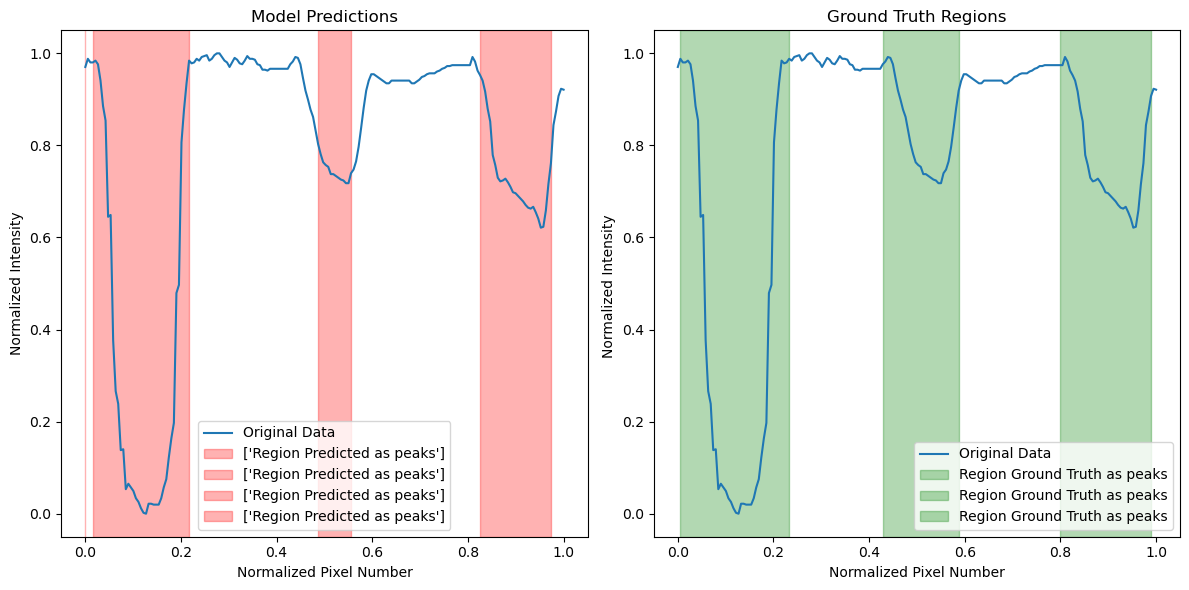

Accuracy: 0.84
Precision: 0.99
Recall (TP/(TP+FN)): 0.73
F1 Score (harmonic mean of precision and recall): 0.84
39-0_jpg.rf.be8387f64ed69b5c8d51b1115ebc3f90.jpg.txt_labeled.txt
(126, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 805us/step


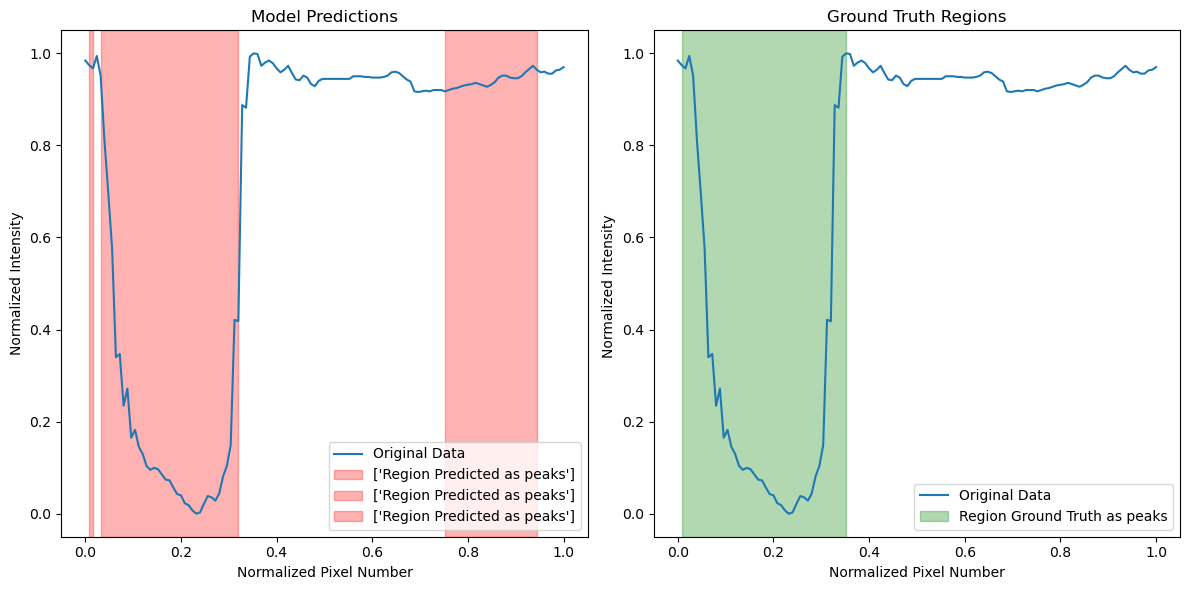

Accuracy: 0.76
Precision: 0.61
Recall (TP/(TP+FN)): 0.89
F1 Score (harmonic mean of precision and recall): 0.72
24-0-5_jpg.rf.ada883cb9ae5bf0c46ec95eb450ca613.jpg.txt_labeled.txt
(143, 3)
<class 'numpy.ndarray'>
5/5 [==============================] - 0s 634us/step


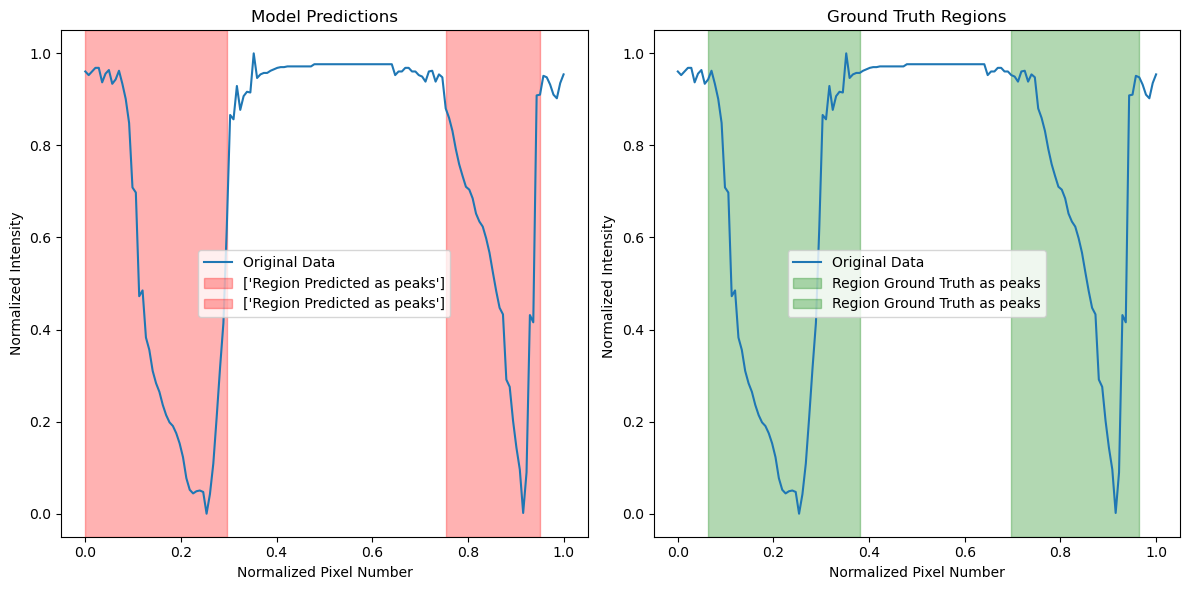

Accuracy: 0.78
Precision: 0.88
Recall (TP/(TP+FN)): 0.74
F1 Score (harmonic mean of precision and recall): 0.80
20-0-05_jpg.rf.c3352b992cdee425a277ec90b13bc5e2.jpg.txt_labeled.txt
(113, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 920us/step


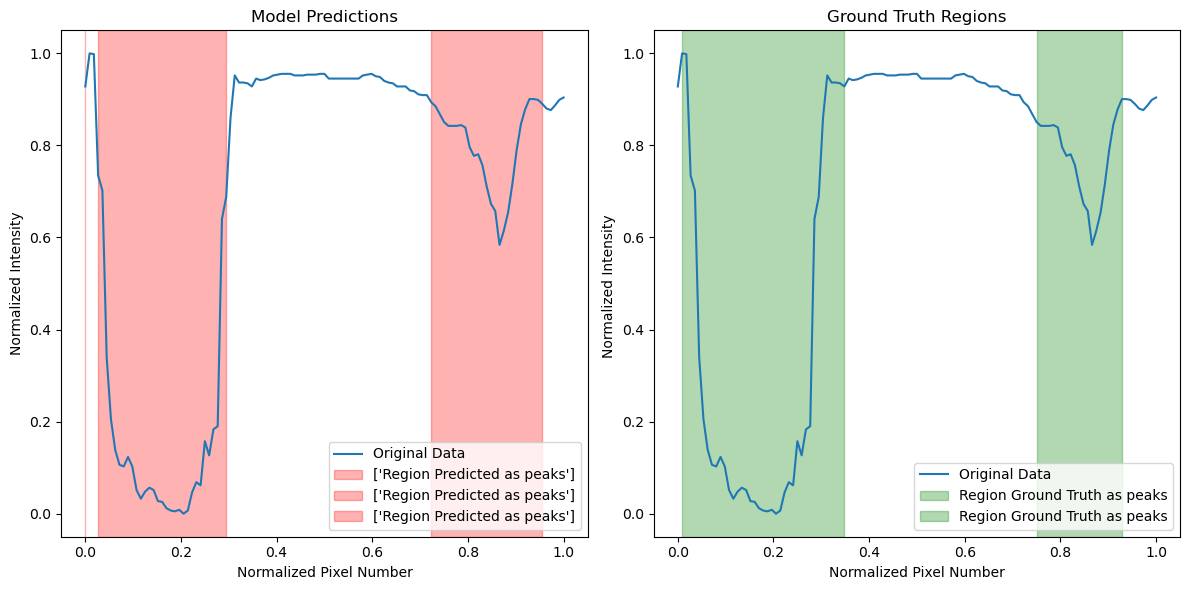

Accuracy: 0.87
Precision: 0.88
Recall (TP/(TP+FN)): 0.87
F1 Score (harmonic mean of precision and recall): 0.87
24-100_jpg.rf.26d0574ae477cb57ce4200737af2bc17.jpg.txt_labeled.txt
(140, 3)
<class 'numpy.ndarray'>
5/5 [==============================] - 0s 617us/step


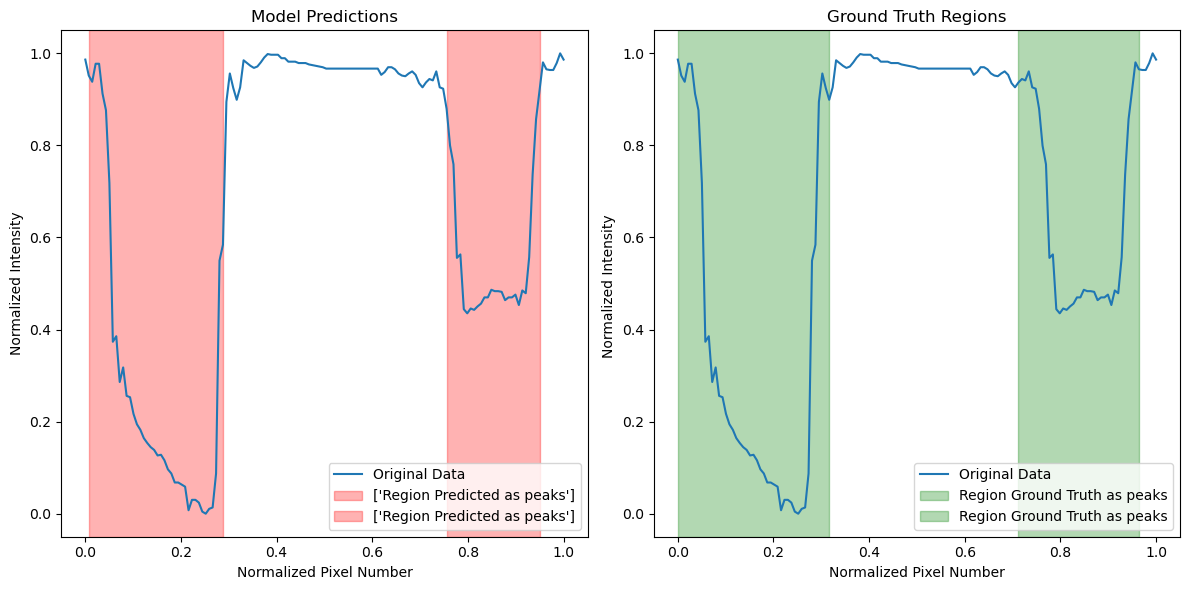

Accuracy: 0.91
Precision: 1.00
Recall (TP/(TP+FN)): 0.84
F1 Score (harmonic mean of precision and recall): 0.91
55-100-_jpg.rf.8e70ff64bb873d2666a83a0024d4564b.jpg.txt_labeled.txt
(149, 3)
<class 'numpy.ndarray'>
5/5 [==============================] - 0s 597us/step


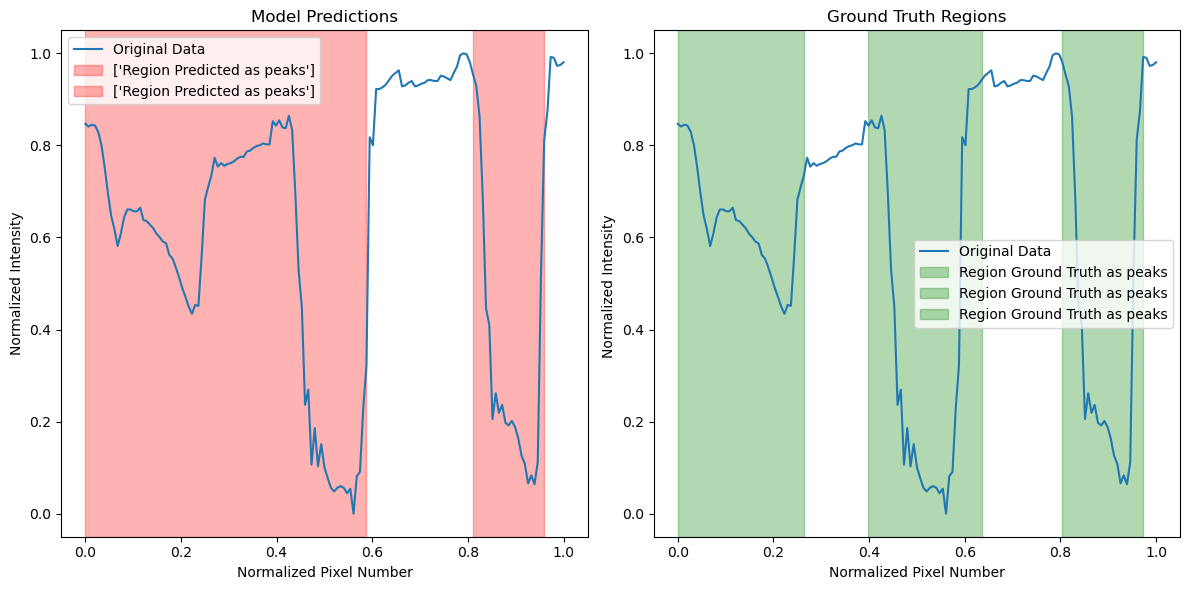

Accuracy: 0.81
Precision: 0.83
Recall (TP/(TP+FN)): 0.90
F1 Score (harmonic mean of precision and recall): 0.86
4-80_jpg.rf.31a3634e05c30269ca665fdceaa1b51a.jpg.txt_labeled.txt
(166, 3)
<class 'numpy.ndarray'>
6/6 [==============================] - 0s 500us/step


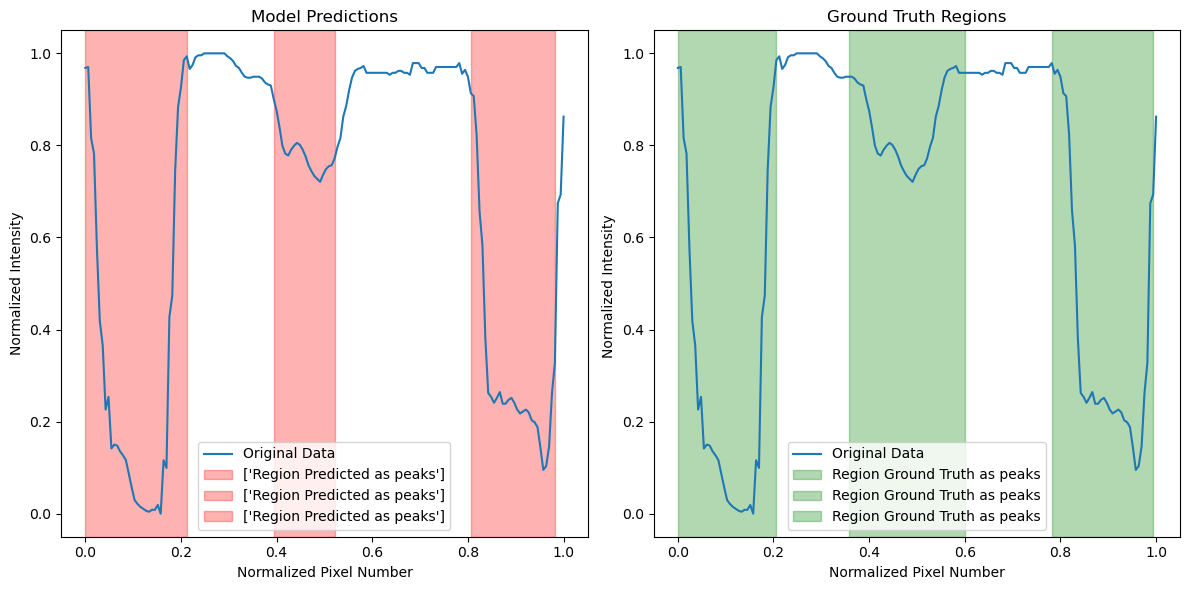

Accuracy: 0.84
Precision: 0.99
Recall (TP/(TP+FN)): 0.78
F1 Score (harmonic mean of precision and recall): 0.87
26-250_jpg.rf.6050078cce946846fc08f0a38fd1fd1d.jpg.txt_labeled.txt
(124, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 583us/step


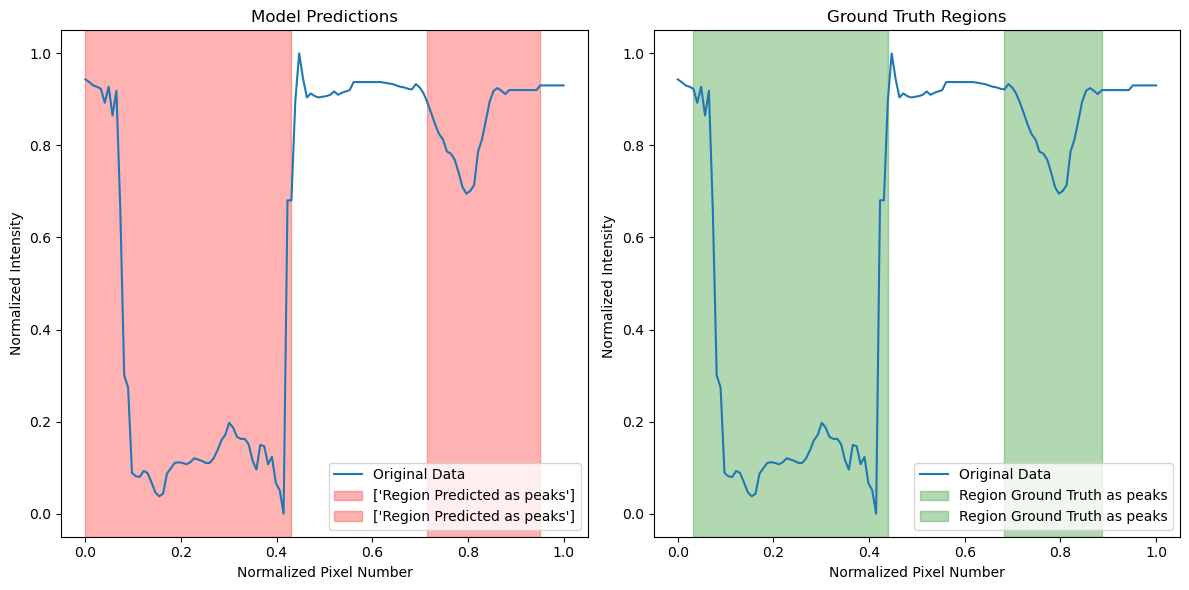

Accuracy: 0.86
Precision: 0.86
Recall (TP/(TP+FN)): 0.94
F1 Score (harmonic mean of precision and recall): 0.89
17-25-_jpg.rf.2e285ff5c1f203a864eaaac956a4d5d8.jpg.txt_labeled.txt
(101, 3)
<class 'numpy.ndarray'>
4/4 [==============================] - 0s 589us/step


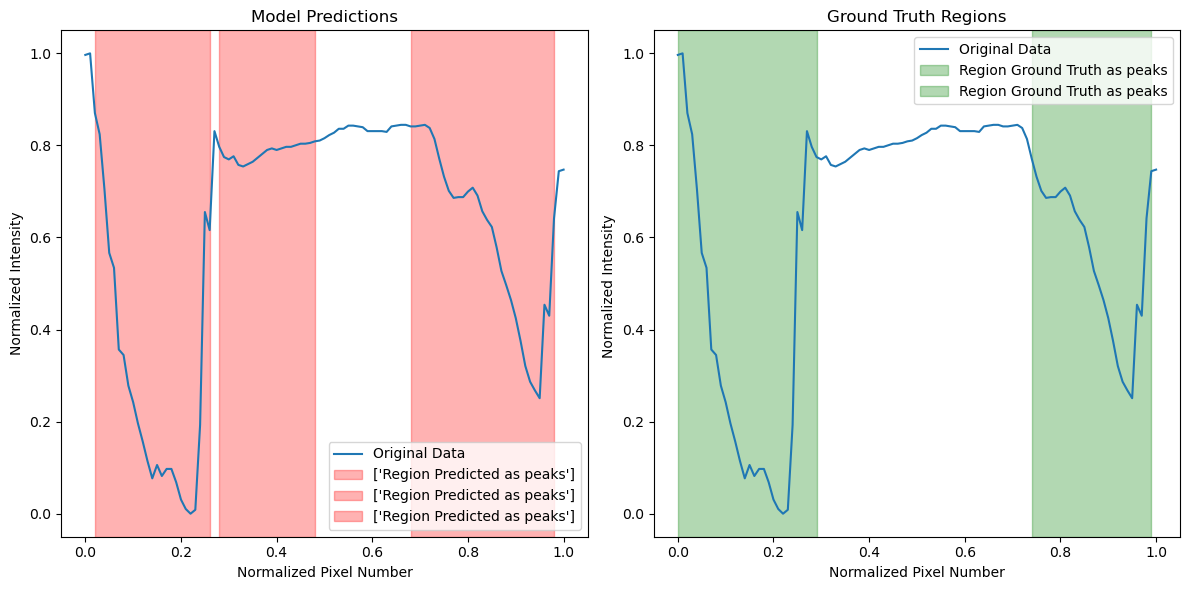

Accuracy: 0.71
Precision: 0.68
Recall (TP/(TP+FN)): 0.93
F1 Score (harmonic mean of precision and recall): 0.78
4-5_jpg.rf.43ffb4854e70f4b2c123df74fcc0ae7f.jpg.txt_labeled.txt
(157, 3)
<class 'numpy.ndarray'>
5/5 [==============================] - 0s 821us/step


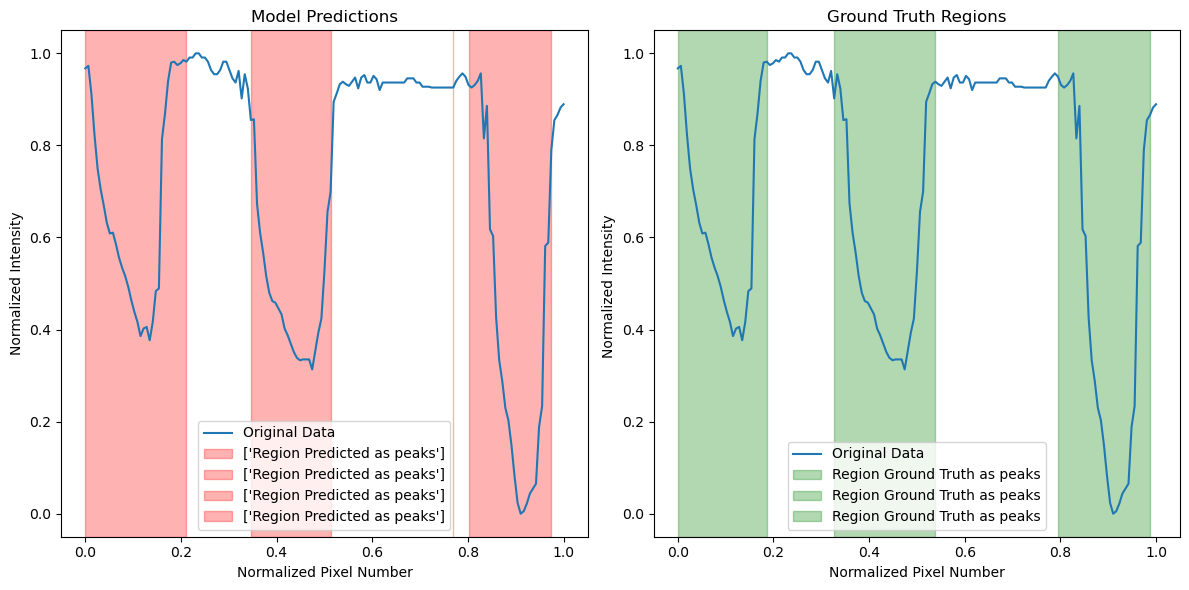

Accuracy: 0.90
Precision: 0.94
Recall (TP/(TP+FN)): 0.89
F1 Score (harmonic mean of precision and recall): 0.92
Average accuracy of the model:  0.8383467466864923
Average precision of the model:  0.9016202534649074
Average recall of the model:  0.8597784723048402
Average f1 score of the model:  0.8713456178893229


In [9]:
loaded_model = load_model(path + 'final_best_whole_18-12-23')

path_test_files = "/Users/ldosnon/Desktop/data_yolov8/Peak_segmentation_database/labeled_array/C_CAT_C/test/"

process_test(path_test_files)
